# Trabalho Prático - Performance Analysis
### Ciência de Dados em Larga Escala
### Lara Sousa e Mariana Serrão

## Notebook 1 - Índice:
- Breve introdução ao trabalho e às bibliotecas exploradas (PySpark, Dask, Modin, JobLib, Rapids e Koalas).
- Explicação dos materiais e métodos utilizados para conduzir os experimentos.
- Detalhamento das máquinas e configurações utilizadas nos experimentos.
- Descrição detalhada do dataset NYC Taxi Driver.
- Repetição do estudo elaborado em 'https://www.databricks.com/blog/2021/04/07/benchmark-koalas-pyspark-and-dask.html' 
- Análise comparativa entre dask e koalas[pyspark].
- Adaptação do estudo para um dataset com 2 ficheiros parquet e um dataset com 3 ficheiros parquet.

## Introdução
No contexto de big data e machine learning, a escolha da biblioteca adequada pode influenciar significativamente a performance e a eficiência de uma pipeline de processamento. O objetivo deste projeto é explorar e comparar as diversas bibliotecas Python, amplamente utilizadas para manipulação de grandes volumes de dados e execução de tarefas de machine learning .

<u>PySpark</u> trata-se de uma interface Python para o Apache Spark, um framework de computação em cluster, que permite o processamento paralelo e distribuído de grandes volumes de dados, facilitando operações de leitura, agregação e transformação de dados em larga escala. As suas principais vantagens incluem alta escalabilidade e eficiência em ambientes distribuídos, sendo habitualmente utilizado para processamento de dados em larga escala, ETL (extração, transformação e carregamento), e análises em tempo real.

<u>Dask</u>, por sua vez, é uma biblioteca Python que permite o paralelismo e o processamento distribuído. Permite expandir a funcionalidade do pandas para conjuntos de dados que não cabem na memória, permitindo operações distribuídas e paralelas. Entre as suas vantagens, destacam-se a interface familiar para utilizadores de pandas, escalabilidade e integração com outras bibliotecas de big data. Para além disso, é frequentemente utilizado para processamento de grandes conjuntos de dados, análise de dados e machine learning.

<u>Modin</u> é outra biblioteca relevante, que paraleliza operações de pandas utilizando Dask ou Ray, oferecendo uma interface similar à de pandas, mas com melhorias de performance significativas para grandes volumes de dados. A sua principal vantagem é a facilidade de uso e a melhoria de performance sem necessidade de grandes mudanças no código. É bastante utilizado para manipulação de dados em larga escala com uma interface familiar a pandas.

<u>JobLib</u> é uma biblioteca para computação paralela e cache de resultados, amplamente utilizada para acelerar tarefas de machine learning que envolvem processamento pesado. Suas vantagens incluem simplicidade na implementação de paralelismo e melhoria de performance em tarefas de machine learning. JobLib é comumente utilizado para paralelização de loops, cache de resultados intermediários e aceleração de pipelines de machine learning.

<u>RapidsAI</u> trata-se de um conjunto de bibliotecas que utiliza GPUs (Graphics Processing Unit ou Unidade de Processamento Gráfico) para acelarar o processamento de dados e tarefas de machine learning. Oferece APIs Python compatíveis com pandas e scikit-learn, mas executa operações em GPUs para ganhos de performance significativos. As suas principais vantagens incluem a aceleração significativa ao utilizar GPUs e a integração com o ecossistema Python. RapidsAI é regularmente utilizado para processamento de dados em GPU e aceleração de tarefas de machine learning.

<u>Koalas</u>, por fim, é uma biblioteca que oferece uma API similar à de pandas, mas para Apache Spark. Facilita a migração de código de pandas para um ambiente distribuído sem grandes mudanças de código. As vantagens abrangem a facilitação da transição de pandas para Spark e a possibilidade de utilizar operações pandas num ambiente distribuído. É bastante utilizado no que toca à manipulação de dados em larga escala utilizando a API familiar de pandas, mas num ambiente Spark.

O propósito central deste trabalho prático é identificar obstáculos de performance ao utilizar bibliotecas específicas, além de analisar as diferenças sintáticas entre as mesmas. Também se pretende determinar quais operações são mais adequadas para cada biblioteca e a familiarização com as mesmas, entendendo o que é suportado em pandas, scikit-learn e numpy. Para alcançar estes objetivos, os estudos descritos num estudo comparativo entre Koalas (PySpark) e Dask serão repetidos, utilizando o dataset NYC Taxi Driver para essa análise e reportando comparações de tempos de execução para cada operação definida. Em seguida, os estudos irão ser modificados para integrar código que utiliza as bibliotecas Modin, JobLib e RapidsAI, utilizando o mesmo dataset NYC Taxi Driver, expandindo para dois e três arquivos parquet do dataset.

Numa fase posterior, vai-se construir uma pipeline de machine learning, para o mesmo dataset, que incluirá etapas de leitura dos dados, pré-processamento, treino e validação dos modelos. O objetivo é desenvolver um modelo capaz de prever a variável alvo "fare_amount", através da aplicação dos modelos XGBRegressor e LogisticRegression, avaliando-o a partir de métricas como acurácia, precisão, recall e f-measure.

## Materiais e Métodos
Para realização do projeto, foi utilizada a Google Cloud Platform (GCP) para criar os recursos de computação necessários. Especificamente, configurou-se uma máquina virtual (VM) e um cluster de máquinas virtuais para realização das análises. A configuração do cluster foi semelhante a uma instância i3.4xlarge da AWS, enquanto a VM foi configurada para ser semelhante a uma instância i3.16xlarge. Esses recursos foram provisionados de acordo com os créditos disponíveis.

A Máquina Virtual (VM) utilizada trata-se de uma instância n2d-highmem-8 com 8 vCPUs baseadas na plataforma AMD Milan, 64 GB de memória RAM e um disco persistente balanceado de 500 GB rodando Ubuntu 20.04 LTS. A instância possui endereços IP internos e externos, com firewall que permite tráfego HTTP e HTTPS. A configuração de segurança inclui vTPM e monitoramento de integridade, enquanto o gerenciamento de API e identidade está configurado para acesso padrão.

O cluster solicitado para o projeto assemelha-se a uma i3.4xlarge AWS, no entanto devido à limitação de créditos no GCP, não foi possível criá-lo e, portanto, repetir o estudo em ambiente distribuído.

Utilizou-se o conjunto de dados "TLC Trip Record Data" fornecido pela Comissão de Táxi e Limusine de Nova York (TLC), que contém registos de viagens de táxi amarelos e verdes, bem como registos de viagens de veículos para contratação ("For-Hire Vehicle" - FHV).Estes registros incluem informações como nome do fornecedor, data e hora de coleta e entrega das viagens, número de passageiros, distância percorrida, coordenadas de latitude e longitude de início e fim da viagem, código de tarifa, indicação de pagamento antecipado, tipos de pagamento, valores de tarifa, taxa de sobretaxa, taxa MTA, valor de gorjeta, valor de pedágio e total da tarifa.

Na fase de download dos dados, utilizou-se os arquivos de dados mensais entre os anos de 2009 a 2013, em formato Parquet. O processo foi automatizado para percorrer todos os meses e anos relevantes dos dados, sendo que para a repetição do estudo de benchmark apenas foi utilizado o primeiro arquivo "yellow_tripdata_2009-01.parquet".

## Download Dataset

Realizou-se o download de arquivos de dados de viagens de táxi no formato Parquet, abrangendo o período de janeiro de 2009 a dezembro de 2013. Realizou-se as seguintes etapas principais:

- Construção de URLs e Localizações de Arquivos: Criou-se um mapeamento entre URLs dos arquivos de dados e os seus locais de download.
- Criação de Diretório: Garantiu-se que o diretório de destino para os arquivos descarregados exista.
- Download de Arquivos: Percorreu-se todas as URLs, fazendo o download dos arquivos e salvando-os no diretório especificado.


In [ ]:
import os
import requests

# Map download url to the file location
url_loc = {} 

for year in range(2009, 2014):
    for m in range(1, 13):
        month = "{:02d}".format(m)
        fname = 'yellow_tripdata_%s-%s.parquet' % (year, month)
        url = 'https://d37ci6vzurychx.cloudfront.net/trip-data/%s' % fname
        loc = 'Ficheiros/taxi_csv/%s' % fname
        url_loc[url] = loc

# Create the directory if it doesn't exist
download_dir = 'Ficheiros/taxi_csv'
os.makedirs(download_dir, exist_ok=True)

# Download files
for url, loc in url_loc.items():
    file_path = os.path.join(download_dir, os.path.basename(loc))
    response = requests.get(url)
    if response.status_code == 200:
        with open(file_path, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {file_path}")
    else:
        print(f"Failed to download {url}: Status code {response.status_code}")

Downloaded Ficheiros/taxi_csv/yellow_tripdata_2009-01.parquet
Downloaded Ficheiros/taxi_csv/yellow_tripdata_2009-02.parquet
Downloaded Ficheiros/taxi_csv/yellow_tripdata_2009-03.parquet
Downloaded Ficheiros/taxi_csv/yellow_tripdata_2009-04.parquet
Downloaded Ficheiros/taxi_csv/yellow_tripdata_2009-05.parquet
Downloaded Ficheiros/taxi_csv/yellow_tripdata_2009-06.parquet
Downloaded Ficheiros/taxi_csv/yellow_tripdata_2009-07.parquet
Downloaded Ficheiros/taxi_csv/yellow_tripdata_2009-08.parquet
Downloaded Ficheiros/taxi_csv/yellow_tripdata_2009-09.parquet
Downloaded Ficheiros/taxi_csv/yellow_tripdata_2009-10.parquet
Downloaded Ficheiros/taxi_csv/yellow_tripdata_2009-11.parquet
Downloaded Ficheiros/taxi_csv/yellow_tripdata_2009-12.parquet
Downloaded Ficheiros/taxi_csv/yellow_tripdata_2010-01.parquet
Downloaded Ficheiros/taxi_csv/yellow_tripdata_2010-02.parquet
Downloaded Ficheiros/taxi_csv/yellow_tripdata_2010-03.parquet
Downloaded Ficheiros/taxi_csv/yellow_tripdata_2010-04.parquet
Download

## Bibliotecas

Instalou-se as bibliotecas necessárias.

In [2]:
%pip install -U koalas dask[complete] numpy pandas pyarrow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Criou-se uma sessão Spark para processamento distribuído de dados, desabilitando o cache de IO do Databricks.

In [1]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("project") \
    .getOrCreate()

# Set the Spark configuration
spark.conf.set("spark.databricks.io.cache.enabled", "false")

# Print the configured value
print("spark.databricks.io.cache.enabled is %s" % spark.conf.get("spark.databricks.io.cache.enabled"))




Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/05 22:19:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


spark.databricks.io.cache.enabled is false


In [2]:
# Importing required packages
import pandas as pd
import pyspark
import pyarrow
import numpy as np

# Check versions
print("pandas version:", pd.__version__)
print("pyspark version:", pyspark.__version__)
print("pyarrow version:", pyarrow.__version__)
print("numpy version:", np.__version__)

pandas version: 1.3.5
pyspark version: 3.4.3
pyarrow version: 11.0.0
numpy version: 1.21.6


In [3]:
import time
from dask.distributed import Client, LocalCluster
import dask.dataframe as dd

In [4]:
import databricks.koalas as ks

## Definição das Funções de Benchmark
##### Definiu-se duas funções:

 - benchmark: mede a duração da execução de uma função específica aplicada a um DataFrame e armazena os resultados de tempo e nome da tarefa num dicionário de benchmarks.
 - get_results: converte o dicionário de benchmarks num DataFrame do pandas para facilitar a visualização e análise dos resultados.

In [5]:
def benchmark(f, df, benchmarks, name, **kwargs):
    """Benchmark the given function against the given DataFrame.
    
    Parameters
    ----------
    f: function to benchmark
    df: data frame
    benchmarks: container for benchmark results
    name: task name
    
    Returns
    -------
    Duration (in seconds) of the given operation
    """
    start_time = time.time()
    ret = f(df, **kwargs)
    benchmarks['duration'].append(time.time() - start_time)
    benchmarks['task'].append(name)
    print(f"{name} took: {benchmarks['duration'][-1]} seconds")
    return benchmarks['duration'][-1]
 
def get_results(benchmarks):
    """Return a pandas DataFrame containing benchmark results."""
    return pd.DataFrame.from_dict(benchmarks)


## Dask

### Inicialização e Carregamento de Dados
Inicializou-se o cliente Dask para gerenciar a computação distribuída. Em seguida, definiu-se o diretório que contém os arquivos Parquet descarregados e verificou-se se o diretório existe. Carregou-se o primeiro arquivo Parquet do conjunto de dados de viagens de táxi de Nova York em um DataFrame Dask. Esta abordagem foi adotada por considerações de memória e para economizar créditos ao utilizar o Google Cloud Platform. Além disso, inicializaram-se três dicionários para armazenar os resultados dos benchmarks, que registram o tempo de execução das operações aplicadas aos dados. O primeiro dicionário (dask_benchmarks) armazenará os resultados de todas as operações, o segundo (dask_benchmarks_filtered) registrará as operações aplicadas aos dados filtrados e o terceiro (dask_benchmarks_cache) as operações com caching.

In [39]:
import os
import dask.dataframe as dd
from dask.distributed import Client
import time

# Initialize Dask client
client = Client()

# Read the downloaded Parquet files
parquet_file = 'Ficheiros/taxi_csv/yellow_tripdata_2009-01.parquet'
dask_data = dd.read_parquet(parquet_file)

# Initialize benchmark dictionary
dask_benchmarks = {
    'duration': [],  # in seconds
    'task': [],
}
dask_benchmarks_filtered = {
    'duration': [],  # in seconds
    'task': [],
}
dask_benchmarks_cache = {
    'duration': [],  # in seconds
    'task': [],
}


/home/marianaaraujoserrao/.local/lib/python3.8/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33001 instead
  warnings.warn(
2024-06-05 22:38:13,332 - distributed.nanny - WARNING - Restarting worker
2024-06-05 22:38:13,345 - distributed.nanny - WARNING - Restarting worker
2024-06-05 22:38:13,352 - distributed.nanny - WARNING - Restarting worker
2024-06-05 22:38:13,469 - distributed.nanny - WARNING - Restarting worker
2024-06-05 22:42:13,579 - distributed.nanny - WARNING - Restarting worker
2024-06-05 22:42:13,597 - distributed.nanny - WARNING - Restarting worker
2024-06-05 22:42:13,598 - distributed.nanny - WARNING - Restarting worker
2024-06-05 22:42:13,609 - distributed.nanny - WARNING - Restarting worker


### Listagem de Colunas
Renomeou-se as colunas do DataFrame Dask para minúsculas, alinhando-as com as funções que foram criadas posteriormente para manipulação desses dados e imprimiu-se a lista de colunas do DataFrame Dask para verificar o carregamento correto.

In [40]:
dask_data = dask_data.rename(columns=str.lower)
columns_list = dask_data.columns
print(columns_list)


Index(['vendor_name', 'trip_pickup_datetime', 'trip_dropoff_datetime',
       'passenger_count', 'trip_distance', 'start_lon', 'start_lat',
       'rate_code', 'store_and_forward', 'end_lon', 'end_lat', 'payment_type',
       'fare_amt', 'surcharge', 'mta_tax', 'tip_amt', 'tolls_amt',
       'total_amt'],
      dtype='object')


### Definição das Funções de Operações
Definiu-se várias funções que executam operações de análise de dados no DataFrame Dask, como contagem de linhas, cálculo de média, desvio padrão, soma e produto de colunas, contagem de valores, operações aritméticas complexas e estatísticas de agrupamento. Também criou-se funções para junção de dados.

In [41]:
def read_file_parquet(df=None):
    return dd.read_parquet('Ficheiros/taxi_csv/yellow_tripdata_2009-01.parquet')
  
def count(df=None):
    return len(df)
 
def count_index_length(df=None):
    return len(df.index)
 
def mean(df):
    return df.fare_amt.mean().compute()
 
def standard_deviation(df):
    return df.fare_amt.std().compute()
 
def mean_of_sum(df):
    return (df.fare_amt + df.tip_amt).mean().compute()
 
def sum_columns(df):
    return (df.fare_amt + df.tip_amt).compute()
 
def mean_of_product(df):
    return (df.fare_amt * df.tip_amt).mean().compute()
 
def product_columns(df):
    return (df.fare_amt * df.tip_amt).compute()
  
def value_counts(df):
    return df.fare_amt.value_counts().compute()
  
def mean_of_complicated_arithmetic_operation(df):
    theta_1 = df.start_lon
    phi_1 = df.start_lat
    theta_2 = df.end_lon
    phi_2 = df.end_lat
    temp = (np.sin((theta_2-theta_1)/2*np.pi/180)**2
           + np.cos(theta_1*np.pi/180)*np.cos(theta_2*np.pi/180) * np.sin((phi_2-phi_1)/2*np.pi/180)**2)
    ret = 2 * np.arctan2(np.sqrt(temp), np.sqrt(1-temp))
    return ret.mean().compute()
  
def complicated_arithmetic_operation(df):
    theta_1 = df.start_lon
    phi_1 = df.start_lat
    theta_2 = df.end_lon
    phi_2 = df.end_lat
    temp = (np.sin((theta_2-theta_1)/2*np.pi/180)**2
           + np.cos(theta_1*np.pi/180)*np.cos(theta_2*np.pi/180) * np.sin((phi_2-phi_1)/2*np.pi/180)**2)
    ret = 2 * np.arctan2(np.sqrt(temp), np.sqrt(1-temp))
    return ret.compute()
  
def groupby_statistics(df):
    return df.groupby(by='passenger_count').agg(
      {
        'fare_amt': ['mean', 'std'], 
        'tip_amt': ['mean', 'std']
      }
    ).compute()
  
other = groupby_statistics(dask_data)
other.columns = pd.Index([e[0]+'_' + e[1] for e in other.columns.tolist()])
 
def join_count(df, other):
    return len(dd.merge(df, other, left_index=True, right_index=True))
 
def join_data(df, other):
    return dd.merge(df, other, left_index=True, right_index=True).compute()

### Execução dos Benchmarks
Executou-se as funções de benchmark definidas anteriormente no DataFrame Dask. Cada função de operação é aplicada ao DataFrame, e o tempo de execução é registrado no dicionário de benchmarks (dask_benchmarks).

In [42]:
benchmark(read_file_parquet, df=None, benchmarks=dask_benchmarks, name='read file')
benchmark(count, df=dask_data, benchmarks=dask_benchmarks, name='count')
benchmark(count_index_length, df=dask_data, benchmarks=dask_benchmarks, name='count index length')
benchmark(mean, df=dask_data, benchmarks=dask_benchmarks, name='mean')
benchmark(standard_deviation, df=dask_data, benchmarks=dask_benchmarks, name='standard deviation')
benchmark(mean_of_sum, df=dask_data, benchmarks=dask_benchmarks, name='mean of columns addition')
benchmark(sum_columns, df=dask_data, benchmarks=dask_benchmarks, name='addition of columns')
benchmark(mean_of_product, df=dask_data, benchmarks=dask_benchmarks, name='mean of columns multiplication')
benchmark(product_columns, df=dask_data, benchmarks=dask_benchmarks, name='multiplication of columns')
benchmark(value_counts, df=dask_data, benchmarks=dask_benchmarks, name='value counts')
benchmark(mean_of_complicated_arithmetic_operation, df=dask_data, benchmarks=dask_benchmarks, name='mean of complex arithmetic ops')
benchmark(complicated_arithmetic_operation, df=dask_data, benchmarks=dask_benchmarks, name='complex arithmetic ops')
benchmark(groupby_statistics, df=dask_data, benchmarks=dask_benchmarks, name='groupby statistics')
benchmark(join_count, dask_data, benchmarks=dask_benchmarks, name='join count', other=other)
benchmark(join_data, dask_data, benchmarks=dask_benchmarks, name='join', other=other)

read file took: 0.0073125362396240234 seconds
count took: 14.161975622177124 seconds
count index length took: 14.0751371383667 seconds
mean took: 14.178173065185547 seconds
standard deviation took: 14.063892364501953 seconds
mean of columns addition took: 13.929075002670288 seconds
addition of columns took: 14.147884368896484 seconds
mean of columns multiplication took: 14.220425844192505 seconds
multiplication of columns took: 14.446113586425781 seconds
value counts took: 14.519860029220581 seconds
mean of complex arithmetic ops took: 15.269702672958374 seconds
complex arithmetic ops took: 15.398111820220947 seconds
groupby statistics took: 14.61258578300476 seconds
join count took: 14.458382368087769 seconds
join took: 14.363636016845703 seconds


14.363636016845703

### Salvar Resultados

In [44]:
# Obter os resultados e remover duplicatas
dask_res_temp = get_results(dask_benchmarks).drop_duplicates(subset='task').set_index('task')

#Print dos dataframes
print(dask_res_temp)

# Definir o nome do arquivo ou diretório
filename = 'Resultados/dask_standard1'

# Salvar o DataFrame em formato Parquet
dask_res_temp.to_parquet(filename)

print(f'O arquivo Parquet foi salvo em {filename}.')

                                 duration
task                                     
read file                        0.007313
count                           14.161976
count index length              14.075137
mean                            14.178173
standard deviation              14.063892
mean of columns addition        13.929075
addition of columns             14.147884
mean of columns multiplication  14.220426
multiplication of columns       14.446114
value counts                    14.519860
mean of complex arithmetic ops  15.269703
complex arithmetic ops          15.398112
groupby statistics              14.612586
join count                      14.458382
join                            14.363636
O arquivo Parquet foi salvo em Resultados/dask_standard1.


### Operações com filtro

Realizaram-se operações de filtragem nos dados, aplicando uma expressão para selecionar registros com valores de tip_amt entre 1 e 5, através da função filter_data, que aplica essa filtragem ao DataFrame Dask (dask_data).

In [49]:
expr_filter = (dask_data.tip_amt >= 1) & (dask_data.tip_amt <= 5)
 
def filter_data(df):
    return df[expr_filter]
  
dask_filtered = filter_data(dask_data)

Novamente, foram executadas as funções de benchmark definidas anteriormente, mas desta vez aplicadas ao DataFrame Dask filtrado, sendo que os resultados são guardados no dicionário dask_benchmarks_filtered.

In [50]:
benchmark(read_file_parquet, df=None, benchmarks=dask_benchmarks_filtered, name='read file')
benchmark(count, dask_filtered, benchmarks=dask_benchmarks_filtered, name='count')
benchmark(count_index_length, dask_filtered, benchmarks=dask_benchmarks_filtered, name='count index length')
benchmark(mean, dask_filtered, benchmarks=dask_benchmarks_filtered, name='mean')
benchmark(standard_deviation, dask_filtered, benchmarks=dask_benchmarks_filtered, name='standard deviation')
benchmark(mean_of_sum, dask_filtered, benchmarks=dask_benchmarks_filtered, name ='mean of columns addition')
benchmark(sum_columns, df=dask_filtered, benchmarks=dask_benchmarks_filtered, name='addition of columns')
benchmark(mean_of_product, dask_filtered, benchmarks=dask_benchmarks_filtered, name ='mean of columns multiplication')
benchmark(product_columns, df=dask_filtered, benchmarks=dask_benchmarks_filtered, name='multiplication of columns')
benchmark(mean_of_complicated_arithmetic_operation, dask_filtered, benchmarks=dask_benchmarks_filtered, name='mean of complex arithmetic ops')
benchmark(complicated_arithmetic_operation, dask_filtered, benchmarks=dask_benchmarks_filtered, name='complex arithmetic ops')
benchmark(value_counts, dask_filtered, benchmarks=dask_benchmarks_filtered, name ='value counts')
benchmark(groupby_statistics, dask_filtered, benchmarks=dask_benchmarks_filtered, name='groupby statistics')
 
other = groupby_statistics(dask_filtered)
other.columns = pd.Index([e[0]+'_' + e[1] for e in other.columns.tolist()])
 
benchmark(join_count, dask_filtered, benchmarks=dask_benchmarks_filtered, name='join count', other=other)
benchmark(join_data, dask_filtered, benchmarks=dask_benchmarks_filtered, name='join', other=other)

read file took: 0.006736278533935547 seconds
count took: 14.47432255744934 seconds
count index length took: 14.53014588356018 seconds
mean took: 14.427309274673462 seconds
standard deviation took: 14.577304363250732 seconds
mean of columns addition took: 14.658457279205322 seconds
addition of columns took: 14.541412115097046 seconds
mean of columns multiplication took: 14.247473955154419 seconds
multiplication of columns took: 14.40138292312622 seconds
mean of complex arithmetic ops took: 14.546414375305176 seconds
complex arithmetic ops took: 14.878332376480103 seconds
value counts took: 14.423734426498413 seconds
groupby statistics took: 14.642592430114746 seconds
join count took: 14.665974855422974 seconds
join took: 14.647319078445435 seconds


14.647319078445435

### Salvar Resultados

In [51]:
# Obter os resultados e remover duplicatas
dask_res_filtered = get_results(dask_benchmarks_filtered).drop_duplicates(subset='task').set_index('task')

#Print dos dataframes
print(dask_res_filtered)

# Definir o nome do arquivo ou diretório
filename_filter = 'Resultados/dask_filtered1'

# Salvar o DataFrame em formato Parquet
dask_res_filtered.to_parquet(filename_filter)

print(f'O arquivo Parquet foi salvo em {filename_filter}.')

                                 duration
task                                     
read file                        0.006736
count                           14.474323
count index length              14.530146
mean                            14.427309
standard deviation              14.577304
mean of columns addition        14.658457
addition of columns             14.541412
mean of columns multiplication  14.247474
multiplication of columns       14.401383
mean of complex arithmetic ops  14.546414
complex arithmetic ops          14.878332
value counts                    14.423734
groupby statistics              14.642592
join count                      14.665975
join                            14.647319
O arquivo Parquet foi salvo em Resultados/dask_filtered1.


### Operações com filtro e caching

Para otimizar o desempenho e acelarar futuras operações que envolvem o DataFrame Dask filtrado, foi aplicado caching. Através da função client.persist, armazenou-se os resultados do DataFrame filtrado em memória, permitindo um acesso mais rápido e eficiente aos dados. Em seguida, aguarda-se até que todas as futuras operações associadas ao DataFrame sejam concluídas usando a função wait.

In [52]:
# Add caching
dask_filtered = client.persist(dask_filtered)
 
from distributed import wait
print('Waiting until all futures are finished')
wait(dask_filtered)
print('All futures are finished')

Waiting until all futures are finished
All futures are finished


Mais uma vez, as funções de benchmark foram executadas, desta vez aplicadas ao DataFrame Dask filtrado e com caching ativado. Cada função de operação é aplicada ao DataFrame filtrado, e o tempo de execução é registrado no dicionário de benchmarks específico para operações com caching (dask_benchmarks_cache). 

In [53]:
benchmark(read_file_parquet, df=None, benchmarks=dask_benchmarks_cache, name='read file')
benchmark(count, dask_filtered, benchmarks=dask_benchmarks_cache, name='count')
benchmark(count_index_length, dask_filtered, benchmarks=dask_benchmarks_cache, name='count index length')
benchmark(mean, dask_filtered, benchmarks=dask_benchmarks_cache, name='mean')
benchmark(standard_deviation, dask_filtered, benchmarks=dask_benchmarks_cache, name='standard deviation')
benchmark(mean_of_sum, dask_filtered, benchmarks=dask_benchmarks_cache, name ='mean of columns addition')
benchmark(sum_columns, df=dask_filtered, benchmarks=dask_benchmarks_cache, name='addition of columns')
benchmark(mean_of_product, dask_filtered, benchmarks=dask_benchmarks_cache, name ='mean of columns multiplication')
benchmark(product_columns, df=dask_filtered, benchmarks=dask_benchmarks_cache, name='multiplication of columns')
benchmark(mean_of_complicated_arithmetic_operation, dask_filtered, benchmarks=dask_benchmarks_cache, name='mean of complex arithmetic ops')
benchmark(complicated_arithmetic_operation, dask_filtered, benchmarks=dask_benchmarks_cache, name='complex arithmetic ops')
benchmark(value_counts, dask_filtered, benchmarks=dask_benchmarks_cache, name ='value counts')
benchmark(groupby_statistics, dask_filtered, benchmarks=dask_benchmarks_cache, name='groupby statistics')
 
other = groupby_statistics(dask_filtered)
other.columns = pd.Index([e[0]+'_' + e[1] for e in other.columns.tolist()])
 
benchmark(join_count, dask_filtered, benchmarks=dask_benchmarks_cache, name='join count', other=other)
benchmark(join_data, dask_filtered, benchmarks=dask_benchmarks_cache, name='join', other=other)


read file took: 0.0063190460205078125 seconds
count took: 0.013732433319091797 seconds
count index length took: 0.019761323928833008 seconds
mean took: 0.04050874710083008 seconds
standard deviation took: 0.048017024993896484 seconds
mean of columns addition took: 0.036644697189331055 seconds
addition of columns took: 0.11289024353027344 seconds
mean of columns multiplication took: 0.04268026351928711 seconds
multiplication of columns took: 0.12211084365844727 seconds
mean of complex arithmetic ops took: 0.2876756191253662 seconds
complex arithmetic ops took: 0.3816397190093994 seconds
value counts took: 0.041202545166015625 seconds
groupby statistics took: 0.15189480781555176 seconds
join count took: 0.22525453567504883 seconds
join took: 0.05157732963562012 seconds


0.05157732963562012

### Salvar Resultados

In [54]:
# Obter os resultados e remover duplicatas
dask_res_cache = get_results(dask_benchmarks_cache).drop_duplicates(subset='task').set_index('task')

#Print dos dataframes
print(dask_res_cache)

# Definir o nome do arquivo ou diretório
filename_cache = 'Resultados/dask_cache1'

# Salvar o DataFrame em formato Parquet
dask_res_cache.to_parquet(filename_cache)

print(f'O arquivo Parquet foi salvo em {filename_cache}.')

                                duration
task                                    
read file                       0.006319
count                           0.013732
count index length              0.019761
mean                            0.040509
standard deviation              0.048017
mean of columns addition        0.036645
addition of columns             0.112890
mean of columns multiplication  0.042680
multiplication of columns       0.122111
mean of complex arithmetic ops  0.287676
complex arithmetic ops          0.381640
value counts                    0.041203
groupby statistics              0.151895
join count                      0.225255
join                            0.051577
O arquivo Parquet foi salvo em Resultados/dask_cache1.


### Reinicialização de Client
Antes de passar para a próxima etapa, reiniciou-se o cliente Dask para garantir que qualquer recurso alocado anteriormente fosse liberado e para começar com um estado limpo ao iniciar a utilização do Koalas.

In [55]:
client.restart()

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:33001/status,
Dashboard: http://127.0.0.1:33001/status,Workers: 4
Total threads: 8,Total memory: 62.79 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42215,Workers: 4
Dashboard: http://127.0.0.1:33001/status,Total threads: 8
Started: 9 minutes ago,Total memory: 62.79 GiB
Comm: tcp://127.0.0.1:34333,Total threads: 2
Dashboard: http://127.0.0.1:40419/status,Memory: 15.70 GiB
Nanny: tcp://127.0.0.1:38271,


## Koalas

### Inicialização e Carregamento de Dados
Inicializou-se o processo de carregamento dos dados utilizando a biblioteca Koalas. Os dados foram lidos a partir do arquivo Parquet com a função ks.read_parquet(). Mais uma vez, foram inicializados três dicionários para armazenar os resultados dos benchmarks, que registam o tempo de execução de todas as operações, das operações aplicadas aos dados filtrados e das operações aplicadas aos dados filtrados com cache.

In [19]:
koalas_data = ks.read_parquet('Ficheiros/taxi_csv/yellow_tripdata_2009-01.parquet')

koalas_benchmarks = {
    'duration': [],  # in seconds
    'task': [],
}

koalas_benchmarks_filtered = {
    'duration': [],  # in seconds
    'task': [],
}

koalas_benchmarks_cache = {
    'duration': [],  # in seconds
    'task': [],
}

### Listagem de Colunas
As colunas do DataFrame Koalas foram renomeadas para minúsculas e imprimiu-se a lista das colunas renomeadas, para verificar a alteração realizada.

In [20]:
# Extract the current column names
current_columns = koalas_data.columns

# Create a dictionary mapping current column names to their lowercase versions
rename_dict = {col: col.lower() for col in current_columns}

# Rename the columns using the dictionary
koalas_data = koalas_data.rename(columns=rename_dict)

# Print the updated column names to verify
columns_list = koalas_data.columns
print(columns_list)

Index(['vendor_name', 'trip_pickup_datetime', 'trip_dropoff_datetime',
       'passenger_count', 'trip_distance', 'start_lon', 'start_lat',
       'rate_code', 'store_and_forward', 'end_lon', 'end_lat', 'payment_type',
       'fare_amt', 'surcharge', 'mta_tax', 'tip_amt', 'tolls_amt',
       'total_amt'],
      dtype='object')


### Definição das Funções de Operações
Definiu-se várias funções  para realizar várias operações nos dados Koalas, como contagem de registros, cálculo da média, desvio padrão, operações aritméticas complexas, contagem de valores únicos, estatísticas de agrupamento e junção de dados. Cada função executa uma operação específica nos dados Koalas e retorna o resultado correspondente.

In [21]:
import pyspark.sql.functions as F
def read_file_parquet(df=None):
    return ks.read_parquet('Ficheiros/taxi_csv/yellow_tripdata_2009-01.parquet')
  
def count(df=None):
    return len(df)
 
def count_index_length(df=None):
    return len(df.index)
 
def mean(df):
    return df.fare_amt.mean()
 
def standard_deviation(df):
    return df.fare_amt.std()
 
def mean_of_sum(df):
    return (df.fare_amt + df.tip_amt).mean()
 
def sum_columns(df):
    x = df.fare_amt + df.tip_amt
    x.to_pandas()
    return x
 
def mean_of_product(df):
    return (df.fare_amt * df.tip_amt).mean()
 
def product_columns(df):
    x = df.fare_amt * df.tip_amt
    x.to_pandas()
    return x
 
def value_counts(df):
    val_counts = df.fare_amt.value_counts()
    val_counts.to_pandas()
    return val_counts
  
def complicated_arithmetic_operation(df):
    theta_1 = df.start_lon
    phi_1 = df.start_lat
    theta_2 = df.end_lon
    phi_2 = df.end_lat
    temp = (np.sin((theta_2 - theta_1) / 2 * np.pi / 180) ** 2
           + np.cos(theta_1 * np.pi / 180) * np.cos(theta_2 * np.pi / 180) * np.sin((phi_2 - phi_1) / 2 * np.pi / 180) ** 2)
    ret = np.multiply(np.arctan2(np.sqrt(temp), np.sqrt(1-temp)),2)
    ret.to_pandas()
    return ret
  
def mean_of_complicated_arithmetic_operation(df):
    theta_1 = df.start_lon
    phi_1 = df.start_lat
    theta_2 = df.end_lon
    phi_2 = df.end_lat
    temp = (np.sin((theta_2 - theta_1) / 2 * np.pi / 180) ** 2
           + np.cos(theta_1 * np.pi / 180) * np.cos(theta_2 * np.pi / 180) * np.sin((phi_2 - phi_1) / 2 * np.pi / 180) ** 2)
    ret = np.multiply(np.arctan2(np.sqrt(temp), np.sqrt(1-temp)),2) 
    return ret.mean()
  
def groupby_statistics(df):
    gb = df.groupby(by='passenger_count').agg(
      {
        'fare_amt': ['mean', 'std'], 
        'tip_amt': ['mean', 'std']
      }
    )
    gb.to_pandas()
    return gb
  
other = ks.DataFrame(groupby_statistics(koalas_data).to_pandas())
other.columns = pd.Index([e[0]+'_' + e[1] for e in other.columns.tolist()])
 
def join_count(df, other):
    return len(df.merge(other.spark.hint("broadcast"), left_index=True, right_index=True))
 
def join_data(df, other):
    ret = df.merge(other.spark.hint("broadcast"), left_index=True, right_index=True)
    ret.to_pandas()
    return ret

Exception in thread "serve-DataFrame" java.net.SocketTimeoutException: Accept timed out
	at java.net.PlainSocketImpl.socketAccept(Native Method)
	at java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:409)
	at java.net.ServerSocket.implAccept(ServerSocket.java:571)
	at java.net.ServerSocket.accept(ServerSocket.java:534)
	at org.apache.spark.security.SocketAuthServer$$anon$1.run(SocketAuthServer.scala:65)


### Execução dos Benchmarks
Foram realizados benchmarks em várias operações nos dados Koalas para avaliar seu desempenho. Primeiro, o tempo de leitura do arquivo Parquet foi medido para entender o tempo necessário para carregar os dados. Em seguida, foram realizadas operações como contagem de registros, cálculo da média, desvio padrão, contagem de valores únicos e estatísticas de agrupamento por número de passageiros. No entanto, algumas operações mais complexas, como adição e multiplicação de colunas e operações aritméticas complexas, foram excluídas dos benchmarks devido a problemas de memória encontrados durante a execução.

In [22]:
benchmark(read_file_parquet, df=None, benchmarks=koalas_benchmarks, name='read file')
benchmark(count, df=koalas_data, benchmarks=koalas_benchmarks, name='count')
benchmark(count_index_length, df=koalas_data, benchmarks=koalas_benchmarks, name='count index length')
benchmark(mean, df=koalas_data, benchmarks=koalas_benchmarks, name='mean')
benchmark(standard_deviation, df=koalas_data, benchmarks=koalas_benchmarks, name='standard deviation')
benchmark(mean_of_sum, df=koalas_data, benchmarks=koalas_benchmarks, name='mean of columns addition')
#benchmark(sum_columns, df=koalas_data, benchmarks=koalas_benchmarks, name='addition of columns')
benchmark(mean_of_product, df=koalas_data, benchmarks=koalas_benchmarks, name='mean of columns multiplication')
#benchmark(product_columns, df=koalas_data, benchmarks=koalas_benchmarks, name='multiplication of columns')
benchmark(value_counts, df=koalas_data, benchmarks=koalas_benchmarks, name='value counts')
#benchmark(complicated_arithmetic_operation, df=koalas_data, benchmarks=koalas_benchmarks, name='complex arithmetic ops')
benchmark(mean_of_complicated_arithmetic_operation, df=koalas_data, benchmarks=koalas_benchmarks, name='mean of complex arithmetic ops')
benchmark(groupby_statistics, df=koalas_data, benchmarks=koalas_benchmarks, name='groupby statistics')
#benchmark(join_count, koalas_data, benchmarks=koalas_benchmarks, name='join count', other=other)
#benchmark(join_data, koalas_data, benchmarks=koalas_benchmarks, name='join', other=other)

read file took: 0.17211437225341797 seconds
count took: 0.18816542625427246 seconds
count index length took: 0.0922548770904541 seconds
mean took: 0.3268430233001709 seconds
standard deviation took: 0.41188526153564453 seconds
mean of columns addition took: 0.5048246383666992 seconds
mean of columns multiplication took: 0.529477596282959 seconds


value counts took: 1.4124960899353027 seconds


mean of complex arithmetic ops took: 6.101566791534424 seconds


groupby statistics took: 1.3523240089416504 seconds


1.3523240089416504

### Salvar Resultados

In [23]:
# Obter os resultados e remover duplicatas
koalas_res_temp = get_results(koalas_benchmarks).drop_duplicates(subset='task').set_index('task')

# Print dos dataframes
print(koalas_res_temp)

# Definir o nome do arquivo ou diretório
filename = 'Resultados/koalas_standard1'

# Salvar o DataFrame em formato Parquet
koalas_res_temp.to_parquet(filename)

print(f'O arquivo Parquet foi salvo em {filename}.')

                                duration
task                                    
read file                       0.172114
count                           0.188165
count index length              0.092255
mean                            0.326843
standard deviation              0.411885
mean of columns addition        0.504825
mean of columns multiplication  0.529478
value counts                    1.412496
mean of complex arithmetic ops  6.101567
groupby statistics              1.352324
O arquivo Parquet foi salvo em Resultados/koalas_standard1.


### Operações com filtro

Para analisar um subconjunto específico dos dados originais, foi criada uma expressão booleana para filtrar os dados Koalas. A expressão seleciona os registros em que o valor da coluna tip_amt está entre 1 e 5. A função filter_data foi aplicada aos dados Koalas, que recebe um DataFrame como entrada e retorna apenas os registros que satisfazem a expressão de filtro.

In [24]:
expr_filter = (koalas_data.tip_amt >= 1) & (koalas_data.tip_amt <= 5)
 
def filter_data(df):
    return df[expr_filter]
 
koalas_filtered = filter_data(koalas_data)

Realizou-se benchmarks em várias operações nos dados filtrados do Koalas para avaliar o seu desempenho, sendo que as operações que causaram problemas de memória foram excluídas dos benchmarks.

In [25]:
benchmark(read_file_parquet, df=None, benchmarks=koalas_benchmarks_filtered, name='read file')
benchmark(count, koalas_filtered, benchmarks=koalas_benchmarks_filtered, name='count')
benchmark(count_index_length, koalas_filtered, benchmarks=koalas_benchmarks_filtered, name='count index length')
benchmark(mean, koalas_filtered, benchmarks=koalas_benchmarks_filtered, name='mean')
benchmark(standard_deviation, koalas_filtered, benchmarks=koalas_benchmarks_filtered, name='standard deviation')
benchmark(mean_of_sum, koalas_filtered, benchmarks=koalas_benchmarks_filtered, name ='mean of columns addition')
#benchmark(sum_columns, df=koalas_filtered, benchmarks=koalas_benchmarks_filtered, name='addition of columns')
benchmark(mean_of_product, koalas_filtered, benchmarks=koalas_benchmarks_filtered, name ='mean of columns multiplication')
#benchmark(product_columns, df=koalas_filtered, benchmarks=koalas_benchmarks_filtered, name='multiplication of columns')
benchmark(mean_of_complicated_arithmetic_operation, koalas_filtered, benchmarks=koalas_benchmarks_filtered, name='mean of complex arithmetic ops')
#benchmark(complicated_arithmetic_operation, koalas_filtered, benchmarks=koalas_benchmarks_filtered, name='complex arithmetic ops')
benchmark(value_counts, koalas_filtered, benchmarks=koalas_benchmarks_filtered, name ='value counts')
benchmark(groupby_statistics, koalas_filtered, benchmarks=koalas_benchmarks_filtered, name='groupby statistics')
 
other = ks.DataFrame(groupby_statistics(koalas_filtered).to_pandas())
other.columns = pd.Index([e[0]+'_' + e[1] for e in other.columns.tolist()])
#benchmark(join_data, koalas_filtered, benchmarks=koalas_benchmarks_filtered, name='join', other=other)
#benchmark(join_count, koalas_filtered, benchmarks=koalas_benchmarks_filtered, name='join count', other=other)

read file took: 0.13342642784118652 seconds
count took: 0.40892791748046875 seconds
count index length took: 0.3011205196380615 seconds
mean took: 0.5436999797821045 seconds
standard deviation took: 0.5450427532196045 seconds
mean of columns addition took: 0.6598494052886963 seconds
mean of columns multiplication took: 0.5534951686859131 seconds


mean of complex arithmetic ops took: 3.8643715381622314 seconds


value counts took: 0.849900484085083 seconds
groupby statistics took: 0.8551814556121826 seconds


In [26]:
# Obter os resultados e remover duplicatas
koalas_res_filtered = get_results(koalas_benchmarks_filtered).drop_duplicates(subset='task').set_index('task')

# Print dos dataframes
print(koalas_res_filtered)

# Definir o nome do arquivo ou diretório
filename_filter = 'Resultados/koalas_filtered1'

# Salvar o DataFrame em formato Parquet
koalas_res_filtered.to_parquet(filename_filter)

print(f'O arquivo Parquet foi salvo em {filename_filter}.')

                                duration
task                                    
read file                       0.133426
count                           0.408928
count index length              0.301121
mean                            0.543700
standard deviation              0.545043
mean of columns addition        0.659849
mean of columns multiplication  0.553495
mean of complex arithmetic ops  3.864372
value counts                    0.849900
groupby statistics              0.855181
O arquivo Parquet foi salvo em Resultados/koalas_filtered1.


### Operações com filtro e caching

Foi adicionado caching aos dados filtrados do Koalas para melhorar o desempenho das operações subsequentes. Os dados filtrados foram armazenados em cache usando o método spark.cache(). Isso significa que os resultados das operações realizadas nos dados filtrados serão temporariamente armazenados em memória, o que pode acelarar o acesso aos dados e reduzir o tempo de execução de operações futuras.

In [28]:
# Add caching
koalas_filtered = koalas_filtered.spark.cache()
print(f'Enforce caching: {len(koalas_filtered)} rows of filtered data')

24/06/05 22:27:05 WARN MemoryStore: Not enough space to cache rdd_186_0 in memory! (computed 242.7 MiB so far)
24/06/05 22:27:05 WARN BlockManager: Persisting block rdd_186_0 to disk instead.
24/06/05 22:27:13 WARN MemoryStore: Not enough space to cache rdd_196_0 in memory! (computed 23.3 MiB so far)
24/06/05 22:27:13 WARN BlockManager: Persisting block rdd_196_0 to disk instead.


Enforce caching: 2573342 rows of filtered data


In [29]:
benchmark(read_file_parquet, df=None, benchmarks=koalas_benchmarks_cache, name='read file')
benchmark(count, df=koalas_filtered, benchmarks=koalas_benchmarks_cache, name='count')
benchmark(count_index_length, df=koalas_filtered, benchmarks=koalas_benchmarks_cache, name='count index length')
benchmark(mean, df=koalas_filtered, benchmarks=koalas_benchmarks_cache, name='mean')
benchmark(standard_deviation, df=koalas_filtered, benchmarks=koalas_benchmarks_cache, name='standard deviation')
benchmark(mean_of_sum, df=koalas_filtered, benchmarks=koalas_benchmarks_cache, name='mean of columns addition')
#benchmark(sum_columns, df=koalas_filtered, benchmarks=koalas_benchmarks_cache, name='addition of columns')
benchmark(mean_of_product, df=koalas_filtered, benchmarks=koalas_benchmarks_cache, name='mean of columns multiplication')
#benchmark(product_columns, df=koalas_filtered, benchmarks=koalas_benchmarks_cache, name='multiplication of columns')
benchmark(value_counts, df=koalas_filtered, benchmarks=koalas_benchmarks_cache, name='value counts')
#benchmark(complicated_arithmetic_operation, df=koalas_filtered, benchmarks=koalas_benchmarks_cache, name='complex arithmetic ops')
benchmark(mean_of_complicated_arithmetic_operation, df=koalas_filtered, benchmarks=koalas_benchmarks_cache, name='mean of complex arithmetic ops')
benchmark(groupby_statistics, df=koalas_filtered, benchmarks=koalas_benchmarks_cache, name='groupby statistics')
#benchmark(join_count, koalas_filtered, benchmarks=koalas_benchmarks_cache, name='join count', other=other)
#benchmark(join_data, koalas_filtered, benchmarks=koalas_benchmarks_cache, name='join', other=other)

read file took: 0.1349334716796875 seconds
count took: 0.06309962272644043 seconds
count index length took: 0.04935574531555176 seconds
mean took: 0.1161506175994873 seconds
standard deviation took: 0.10100364685058594 seconds
mean of columns addition took: 0.1806504726409912 seconds
mean of columns multiplication took: 0.12845778465270996 seconds
value counts took: 0.3059096336364746 seconds


mean of complex arithmetic ops took: 1.7836480140686035 seconds
groupby statistics took: 0.4087488651275635 seconds


0.4087488651275635

### Salvar Resultados

In [30]:
# Obter os resultados e remover duplicatas
koalas_res_cache = get_results(koalas_benchmarks_cache).drop_duplicates(subset='task').set_index('task')

# Print dos dataframes
print(koalas_res_cache)

# Definir o nome do arquivo ou diretório
filename_cache = 'Resultados/koalas_cache1'

# Salvar o DataFrame em formato Parquet
koalas_res_cache.to_parquet(filename_cache)

print(f'O arquivo Parquet foi salvo em {filename_cache}.')

                                duration
task                                    
read file                       0.134933
count                           0.063100
count index length              0.049356
mean                            0.116151
standard deviation              0.101004
mean of columns addition        0.180650
mean of columns multiplication  0.128458
value counts                    0.305910
mean of complex arithmetic ops  1.783648
groupby statistics              0.408749
O arquivo Parquet foi salvo em Resultados/koalas_cache1.


## Resultados

In [45]:
import os
import shutil
from datetime import datetime

def get_results(benchmarks):
    return pd.DataFrame(benchmarks)

### Dados completos

Para comparar o desempenho do Koalas com o Dask em todas as operações realizadas nos dados, inicialmente, obteve-se os resultados dos benchmarks para cada operação em ambas as bibliotecas. Em seguida, foram removidas as duplicas e concatenados os resultados num DataFrame.

In [56]:
# Obter os resultados e remover duplicatas
koalas_res_temp = get_results(koalas_benchmarks).drop_duplicates(subset='task').set_index('task')
dask_res_temp = get_results(dask_benchmarks).drop_duplicates(subset='task').set_index('task')

# Concatenar os resultados
df = pd.concat([koalas_res_temp['duration'], dask_res_temp['duration']], axis=1, keys=['koalas', 'dask'])

# Exibir o DataFrame resultante
print(df)

                                  koalas       dask
task                                               
read file                       0.172114   0.007313
count                           0.188165  14.161976
count index length              0.092255  14.075137
mean                            0.326843  14.178173
standard deviation              0.411885  14.063892
mean of columns addition        0.504825  13.929075
mean of columns multiplication  0.529478  14.220426
value counts                    1.412496  14.519860
mean of complex arithmetic ops  6.101567  15.269703
groupby statistics              1.352324  14.612586
addition of columns                  NaN  14.147884
multiplication of columns            NaN  14.446114
complex arithmetic ops               NaN  15.398112
join count                           NaN  14.458382
join                                 NaN  14.363636


É importante ressaltar que algumas operações não puderam ser realizadas no Koalas devido a problemas relacionados à memória, o que explica os valores NaN. Por exemplo, a adição de colunas, a multiplicação de colunas, operações aritméticas complexas e junções não foram possíveis no Koalas, apesar de terem sido executadas com sucesso no Dask.

Em seguida, o DataFrame com os resultados em formato Parquet foram guardados no local especificado pelo nome do arquivo.

In [57]:
# Definir o nome do arquivo ou diretório
 
filename = 'Resultados/results_standard'

# Salvar o DataFrame em formato Parquet
df.to_parquet(filename)

print(f'O arquivo Parquet foi salvo em {filename}.')


O arquivo Parquet foi salvo em Resultados/results_standard.


### Dados filtrados

Compara-se resultados das operações em dados filtrados realizadas com o Koalas e o Dask, da mesma forma realizada anteriormente.

In [58]:
# Obter os resultados e remover duplicatas
koalas_res_temp = get_results(koalas_benchmarks_filtered).drop_duplicates(subset='task').set_index('task')
dask_res_temp = get_results(dask_benchmarks_filtered).drop_duplicates(subset='task').set_index('task')

# Concatenar os resultados
df = pd.concat([koalas_res_temp['duration'], dask_res_temp['duration']], axis=1, keys=['koalas', 'dask'])

# Exibir o DataFrame resultante
print(df)

                                  koalas       dask
task                                               
read file                       0.133426   0.006736
count                           0.408928  14.474323
count index length              0.301121  14.530146
mean                            0.543700  14.427309
standard deviation              0.545043  14.577304
mean of columns addition        0.659849  14.658457
mean of columns multiplication  0.553495  14.247474
mean of complex arithmetic ops  3.864372  14.546414
value counts                    0.849900  14.423734
groupby statistics              0.855181  14.642592
addition of columns                  NaN  14.541412
multiplication of columns            NaN  14.401383
complex arithmetic ops               NaN  14.878332
join count                           NaN  14.665975
join                                 NaN  14.647319


Guarda-se o DataFrame com os resultados no local especificado.

In [59]:
# Definir o nome do arquivo ou diretório
 
filename = 'Resultados/results_filtered'

# Salvar o DataFrame em formato Parquet
df.to_parquet(filename)

print(f'O arquivo Parquet foi salvo em {filename}.')

O arquivo Parquet foi salvo em Resultados/results_filtered.


### Dados filtrados com caching

Obtém-se os resultados das operações Dask e Koalas em dados filtrados com caching

In [60]:
# Obter os resultados e remover duplicatas
koalas_res_temp = get_results(koalas_benchmarks_cache).drop_duplicates(subset='task').set_index('task')
dask_res_temp = get_results(dask_benchmarks_cache).drop_duplicates(subset='task').set_index('task')

# Concatenar os resultados
df = pd.concat([koalas_res_temp['duration'], dask_res_temp['duration']], axis=1, keys=['koalas', 'dask'])

# Exibir o DataFrame resultante
print(df)

                                  koalas      dask
task                                              
read file                       0.134933  0.006319
count                           0.063100  0.013732
count index length              0.049356  0.019761
mean                            0.116151  0.040509
standard deviation              0.101004  0.048017
mean of columns addition        0.180650  0.036645
mean of columns multiplication  0.128458  0.042680
value counts                    0.305910  0.041203
mean of complex arithmetic ops  1.783648  0.287676
groupby statistics              0.408749  0.151895
addition of columns                  NaN  0.112890
multiplication of columns            NaN  0.122111
complex arithmetic ops               NaN  0.381640
join count                           NaN  0.225255
join                                 NaN  0.051577


Guarda-se o DataFrame resultante em formato Parquet.

In [61]:
# Definir o nome do arquivo ou diretório
 
filename = 'Resultados/results_cache'

# Salvar o DataFrame em formato Parquet
df.to_parquet(filename)

print(f'O arquivo Parquet foi salvo em {filename}.')

O arquivo Parquet foi salvo em Resultados/results_cache.


## Resumo

Como forma de resumo dos resultados dos benchmarks, estes são analisados para calcular as médias das durações das operações em diferentes execuções. Primeiro, os dados (resultados) são carregados a partir dos arquivos Parquet e, em seguida, as médias justas das durações das operações são calculadas para cada biblioteca (Koalas e Dask).

Os resultados são divididos em três grupos: resumo das operações padrão, resumo das operações com filtragem e resumo das operações com filtragem e cache. Cada resumo exibe as médias dos tempos de execução para cada operação em ambas as bibliotecas.

No resumo das operações padrão, são mostrados os tempos médios de execução das operações sem filtragem. No das operações com filtragem, são apresentadas as médias dos tempos de execução das operações aplicadas a dados filtrados. E, finalmente, no resumo das operações com filtragem e cache, são exibidas as médias dos tempos de execução das operações aplicadas a dados filtrados e em cache.

In [62]:
import os
import pandas as pd
from scipy import stats
from datetime import datetime

def fair_avg(durations):
    """Get an average duration among multiple durations fairly by removing the first run and the best run first."""
    if len(durations) <= 2:  # Verifica se há pelo menos 3 durações
        return sum(durations) / len(durations) if durations else 0
    durations = durations[1:]
    durations.remove(min(durations))
    return sum(durations) / len(durations)

def rename_index(df):
    """Rename operations in the average result dataframe for clarity."""
    df.index = map(
        lambda s: s.replace("filtered ", "")
                  .replace("of columns", "of series")
                  .replace("addition of series", "series addition")
                  .replace("multiplication of series", "series multiplication")
                  .replace("arithmetic ops", "arithmetic")
                  .replace("count index length", "count index"),
        df.index)
    return df

def avg_result_df(directory, file_name_prefix):
    """Get result files with the given prefix from the given directory and then construct the average result dataframe."""
    dfs = []
    file_infos = os.listdir(directory)
    for file_info in file_infos:
        if file_info.startswith(file_name_prefix):
            dfs.append(pd.read_parquet(os.path.join(directory, file_info)))
    
    if not dfs:
        raise ValueError(f"No files found with prefix {file_name_prefix} in directory {directory}")
    
    print(f'{file_name_prefix} has {len(dfs)} runs')
    
    avg_df = dfs[0].copy()
    for op in dfs[0].index:
        for lib in ['koalas', 'dask']:
            durations = []
            for df in dfs:
                durations.append(df.loc[op][lib])
            avg_df.loc[op][lib] = fair_avg(durations)
            
    return rename_index(avg_df)

def annotate(ax):
    """Annotate the height of each bar in the plot."""
    for p in ax.patches:
        ax.annotate("%.2fs" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

def annotate_x_times_faster(ax, x_times_list):
    """Annotate Koalas is how many times faster per operation in the plot."""
    num_ops = len(x_times_list)
    for i, p in enumerate(ax.patches):
        if i < num_ops:  # The first half of ax.patches of Koalas; we only annotate Koalas patches
            ax.annotate("%.1fx" % x_times_list[i], (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(4, 10), textcoords='offset points', fontsize=8, weight='bold', color="#585858")

# Definir os caminhos dos arquivos de resultados Parquet
directory_path = 'Resultados'
standard_file_prefix = 'results_standard'
filtered_file_prefix = 'results_filtered'
cache_file_prefix = 'results_cache'

# Carregar os resultados e calcular as médias
standard_res_df = avg_result_df(directory_path, standard_file_prefix)
filtered_res_df = avg_result_df(directory_path, filtered_file_prefix)
cache_res_df = avg_result_df(directory_path, cache_file_prefix)

# Definir os nomes das colunas
standard_res_df.columns = ['Koalas (PySpark)', 'Dask']
filtered_res_df.columns = ['Koalas (PySpark)', 'Dask']
cache_res_df.columns = ['Koalas (PySpark)', 'Dask']

standard_ops = standard_res_df
ops_with_filtering = filtered_res_df
ops_with_filtering_caching = cache_res_df

# Exibir os DataFrames resultantes
print("Standard Operations Summary:")
print(standard_ops)
print("\nOperations with Filtering Summary:")
print(ops_with_filtering)
print("\nOperations with Filtering and Caching Summary:")
print(ops_with_filtering_caching)


results_standard has 1 runs
results_filtered has 1 runs
results_cache has 1 runs
Standard Operations Summary:
                               Koalas (PySpark)       Dask
read file                              0.172114   0.007313
count                                  0.188165  14.161976
count index                            0.092255  14.075137
mean                                   0.326843  14.178173
standard deviation                     0.411885  14.063892
mean of series addition                0.504825  13.929075
mean of series multiplication          0.529478  14.220426
value counts                           1.412496  14.519860
mean of complex arithmetic             6.101567  15.269703
groupby statistics                     1.352324  14.612586
series addition                             NaN  14.147884
series multiplication                       NaN  14.446114
complex arithmetic                          NaN  15.398112
join count                                  NaN  14.458382
join 

## Comparação Visual - Dados completos

### Tempo de Execução por Operação
Para visualizar melhor os resultados e compreender as diferenças nos tempos de execução entre as bibliotecas Koalas e Dask, gerou-se um gráfico de barras, que representa os tempos de execução das operações padrão em ambas as bibliotecas, indicando o tempo decorrido em segundos para cada operação. Além disso, há uma anotação que mostra quantas vezes mais rápida uma biblioteca é em relação à outra para cada operação.

Text(0, 0.5, 'Elapsed time (sec)')

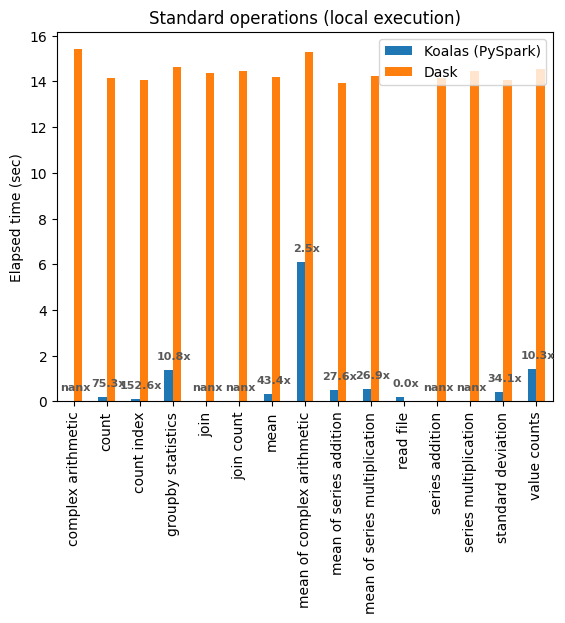

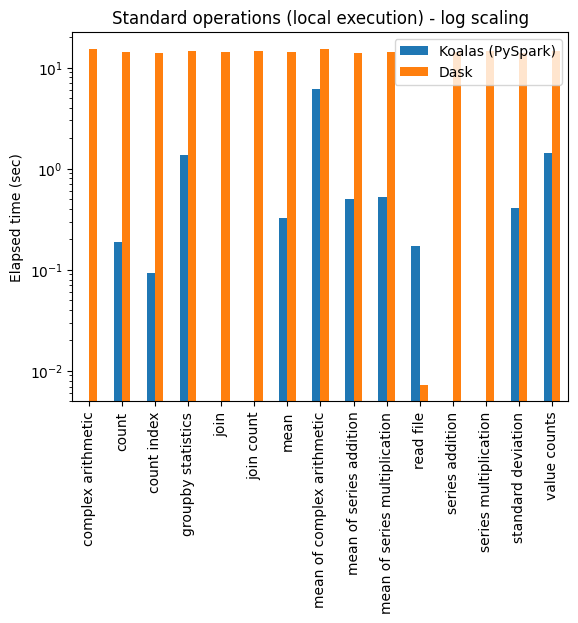

In [63]:
import matplotlib.pyplot as plt

plot_title = 'Standard operations (local execution)'
 
ax = standard_ops.sort_index().plot.bar(title=plot_title)
ax.set_ylabel("Elapsed time (sec)")
 
tmp_df_x_times_faster = standard_ops.sort_index().copy()
tmp_df_x_times_faster['Dask / Koalas'] = tmp_df_x_times_faster.Dask / tmp_df_x_times_faster['Koalas (PySpark)']
tmp_df_x_times_faster['Koalas / Dask'] = tmp_df_x_times_faster['Koalas (PySpark)'] / tmp_df_x_times_faster.Dask
annotate_x_times_faster(ax, x_times_list=tmp_df_x_times_faster['Dask / Koalas'].to_list())
 
standard_ops.sort_index().plot.bar(logy=True, title='%s - log scaling' % plot_title).set_ylabel("Elapsed time (sec)")

É mostrado um dataFrame temporário que calcula quantas vezes mais rápido o Dask é em relação ao Koalas para cada operação.

In [64]:
tmp_df_x_times_faster

,Koalas (PySpark),Dask,Dask / Koalas,Koalas / Dask
complex arithmetic,NaN,15.398112,NaN,NaN
count,0.188165,14.161976,75.263431,0.013287
count index,0.092255,14.075137,152.567946,0.006554
groupby statistics,1.352324,14.612586,10.805536,0.092545
join,NaN,14.363636,NaN,NaN
join count,NaN,14.458382,NaN,NaN
mean,0.326843,14.178173,43.379152,0.023053
mean of complex arithmetic,6.101567,15.269703,2.502587,0.399586
mean of series addition,0.504825,13.929075,27.591908,0.036243
mean of series multiplication,0.529478,14.220426,26.857465,0.037234


### Média Geométrica
A média geométrica das razões entre os tempos de execução do Dask e do Koalas para cada operação foi calculada e plotada num gráfico de barras.

Dado que a divisão por Nan no cálculo da média geométrica dá como resultado 0, decidiu-se excluir os valores NaN.

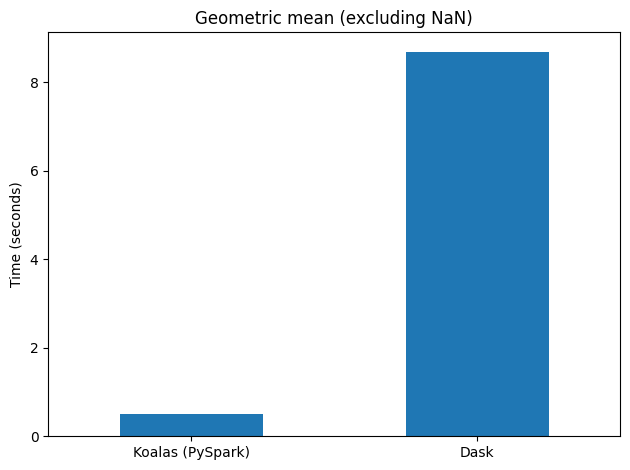

In [65]:
# Calcular a média geométrica excluindo os valores NaN
koalas_gmean = stats.gmean(standard_ops['Koalas (PySpark)'].dropna())
dask_gmean = stats.gmean(standard_ops['Dask'].dropna())

# Plotar a média geométrica
ax = pd.Series([koalas_gmean, dask_gmean], index=['Koalas (PySpark)', 'Dask']).plot.bar(title='Geometric mean (excluding NaN)')
ax.set_ylabel('Time (seconds)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Tempo total de execução 
Por fim, elaborou-se um gráfico que mostra o tempo total de execução de todas as operações para cada biblioteca (Koalas e Dask). Cada barra representa o tempo total de execução acumulado de todas as operações para a respetiva biblioteca.

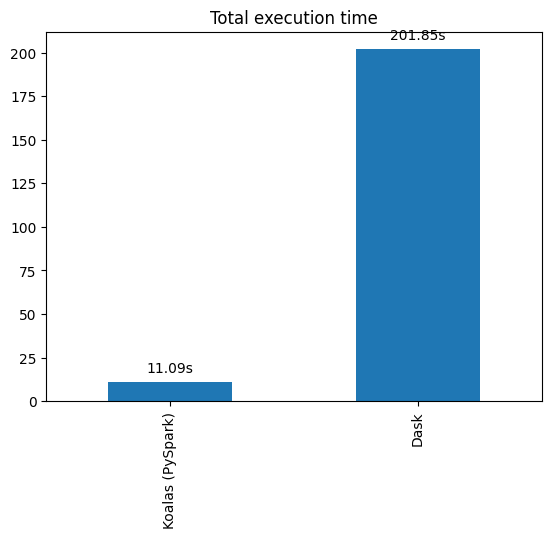

In [66]:
annotate(standard_ops.sum().plot.bar(title='Total execution time'))

Adicionou-se um gráfico para ilustrar a comparação entre os tempos de execução das operações utilizando as bibliotecas Koalas e Dask. Este gráfico não fazia parte do experimento original, mas foi incluído para demonstrar visualmente como os valores NaN fazem sentido, uma vez que essas operações não foram executadas.

## Comparação Visual - Dados Filtrados

### Tempo de Execução por Operação
Gerou-se um gráfico de barras, que representa os tempos de execução das operações padrão em dados filtrados em ambas as bibliotecas.

Text(0, 0.5, 'Elapsed time (sec)')

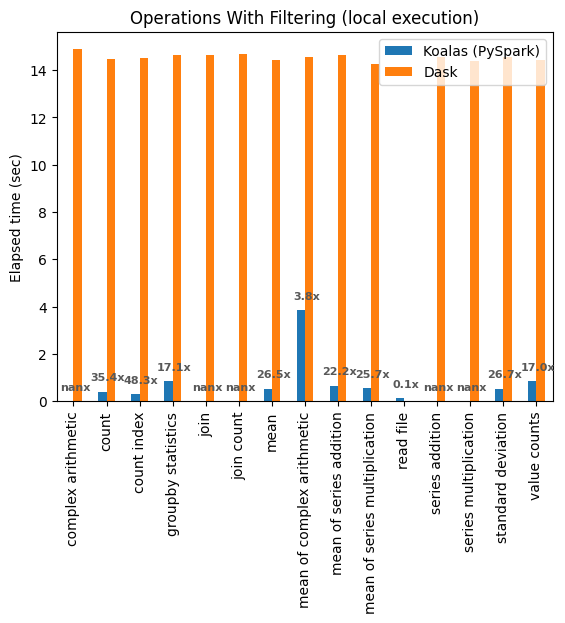

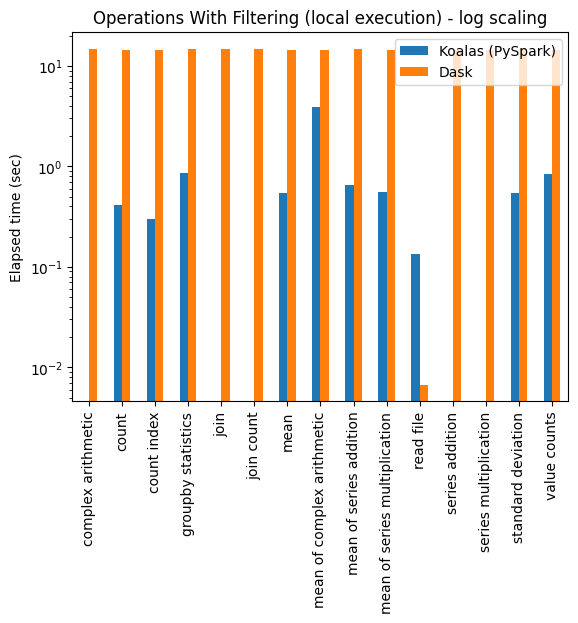

In [67]:
import matplotlib.pyplot as plt

plot_title = 'Operations With Filtering (local execution)'
 
ax = ops_with_filtering.sort_index().plot.bar(title=plot_title)
ax.set_ylabel("Elapsed time (sec)")
 
tmp_df_x_times_faster = ops_with_filtering.sort_index().copy()
tmp_df_x_times_faster['Dask / Koalas'] = tmp_df_x_times_faster.Dask / tmp_df_x_times_faster['Koalas (PySpark)']
tmp_df_x_times_faster['Koalas / Dask'] = tmp_df_x_times_faster['Koalas (PySpark)'] / tmp_df_x_times_faster.Dask
annotate_x_times_faster(ax, x_times_list=tmp_df_x_times_faster['Dask / Koalas'].to_list())
 
ops_with_filtering.sort_index().plot.bar(logy=True, title='%s - log scaling' % plot_title).set_ylabel("Elapsed time (sec)")

É mostrado um dataFrame temporário que calcula quantas vezes mais rápido o Dask é em relação ao Koalas para cada operação.

In [68]:
tmp_df_x_times_faster

,Koalas (PySpark),Dask,Dask / Koalas,Koalas / Dask
complex arithmetic,NaN,14.878332,NaN,NaN
count,0.408928,14.474323,35.395780,0.028252
count index,0.301121,14.530146,48.253589,0.020724
groupby statistics,0.855181,14.642592,17.122205,0.058404
join,NaN,14.647319,NaN,NaN
join count,NaN,14.665975,NaN,NaN
mean,0.543700,14.427309,26.535424,0.037685
mean of complex arithmetic,3.864372,14.546414,3.764238,0.265658
mean of series addition,0.659849,14.658457,22.214853,0.045015
mean of series multiplication,0.553495,14.247474,25.740918,0.038849


### Média Geométrica
A média geométrica das razões entre os tempos de execução do Dask e do Koalas para cada operação.

De forma análoga, excluiu-se os valores NaN no cálculo da média geométrica.

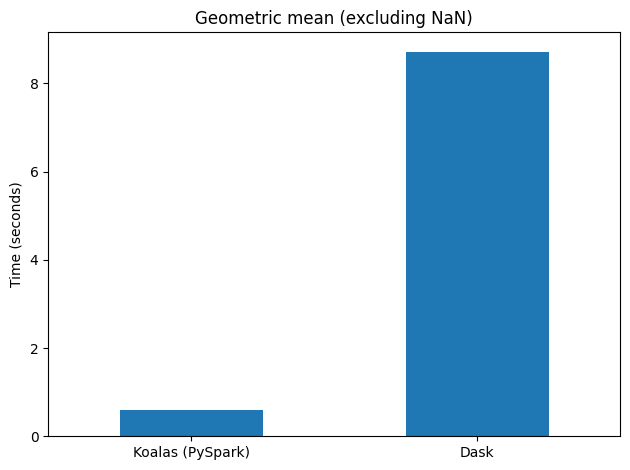

In [69]:
# Calcular a média geométrica excluindo os valores NaN
koalas_gmean = stats.gmean(ops_with_filtering['Koalas (PySpark)'].dropna())
dask_gmean = stats.gmean(ops_with_filtering['Dask'].dropna())

# Plotar a média geométrica
ax = pd.Series([koalas_gmean, dask_gmean], index=['Koalas (PySpark)', 'Dask']).plot.bar(title='Geometric mean (excluding NaN)')
ax.set_ylabel('Time (seconds)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



### Tempo total de execução 
Gráfico que mostra o tempo total de execução das operações em dados filtrados para cada biblioteca (Koalas e Dask).

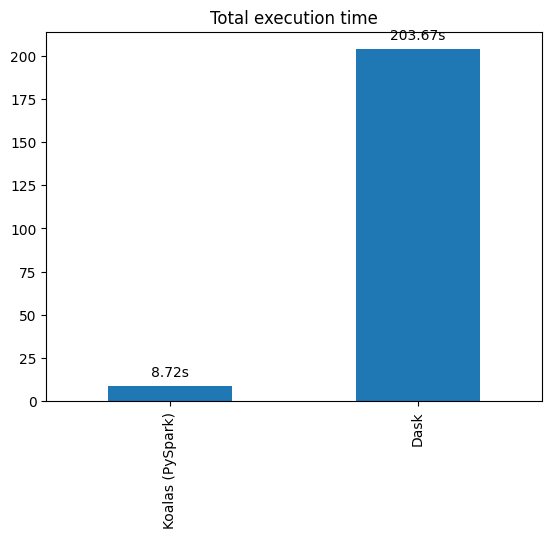

In [70]:
annotate(ops_with_filtering.sum().plot.bar(title='Total execution time'))

## Comparação Visual - Dados Filtrados com Caching

### Tempo de Execução por Operação
Gerou-se um gráfico de barras, que representa os tempos de execução das operações padrão em dados filtrados com aplicação de caching.

Text(0, 0.5, 'Elapsed time (sec)')

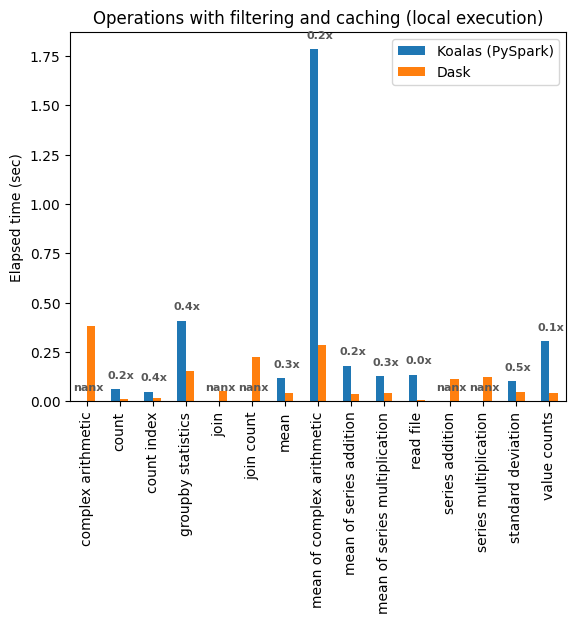

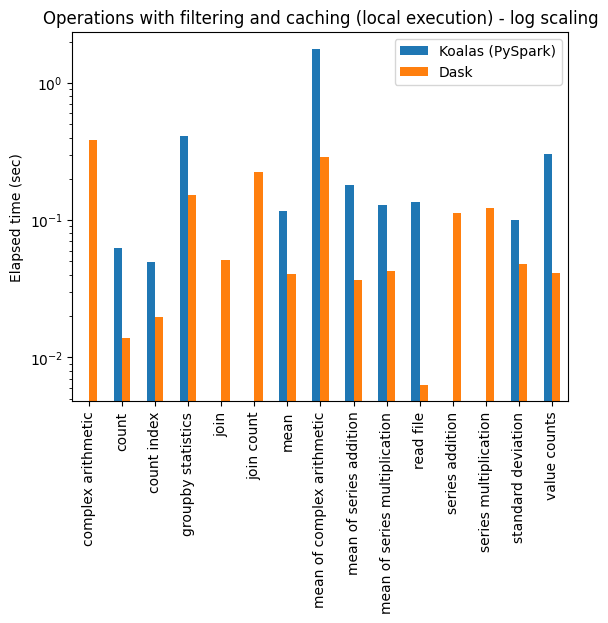

In [71]:
plot_title = 'Operations with filtering and caching (local execution)'
 
ax = ops_with_filtering_caching.sort_index().plot.bar(title=plot_title)
ax.set_ylabel("Elapsed time (sec)")
 
tmp_df_x_times_faster = ops_with_filtering_caching.sort_index().copy()
tmp_df_x_times_faster['Dask / Koalas'] = tmp_df_x_times_faster.Dask / tmp_df_x_times_faster['Koalas (PySpark)']
tmp_df_x_times_faster['Koalas / Dask'] = tmp_df_x_times_faster['Koalas (PySpark)'] / tmp_df_x_times_faster.Dask
annotate_x_times_faster(ax, x_times_list=tmp_df_x_times_faster['Dask / Koalas'].to_list())
 
ops_with_filtering_caching.sort_index().plot.bar(logy=True, title='%s - log scaling' % plot_title).set_ylabel("Elapsed time (sec)")

DataFrame temporário que calcula quantas vezes mais rápido o Dask é em relação ao Koalas para cada operação.

In [72]:
tmp_df_x_times_faster

,Koalas (PySpark),Dask,Dask / Koalas,Koalas / Dask
complex arithmetic,NaN,0.381640,NaN,NaN
count,0.063100,0.013732,0.217631,4.594934
count index,0.049356,0.019761,0.400385,2.497593
groupby statistics,0.408749,0.151895,0.371609,2.691000
join,NaN,0.051577,NaN,NaN
join count,NaN,0.225255,NaN,NaN
mean,0.116151,0.040509,0.348760,2.867297
mean of complex arithmetic,1.783648,0.287676,0.161285,6.200206
mean of series addition,0.180650,0.036645,0.202849,4.929785
mean of series multiplication,0.128458,0.042680,0.332251,3.009770


### Média Geométrica
A média geométrica das razões entre os tempos de execução do Dask e do Koalas para cada operação.

Pela mesma razão mencionada anteriormente, decidiu-se excluir os valores NaN.

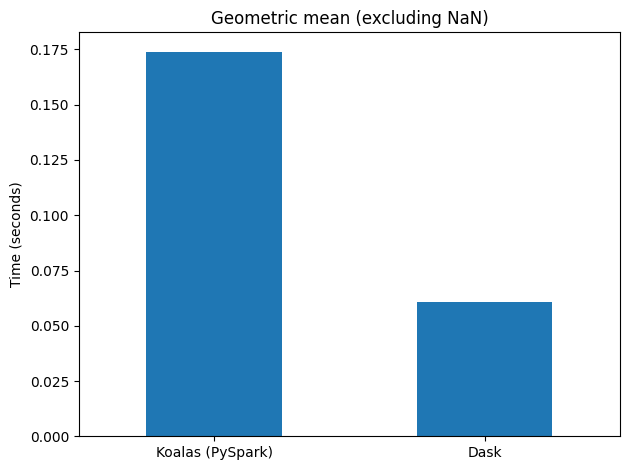

In [73]:
# Calcular a média geométrica excluindo os valores NaN
koalas_gmean = stats.gmean(ops_with_filtering_caching['Koalas (PySpark)'].dropna())
dask_gmean = stats.gmean(ops_with_filtering_caching['Dask'].dropna())

# Plotar a média geométrica
ax = pd.Series([koalas_gmean, dask_gmean], index=['Koalas (PySpark)', 'Dask']).plot.bar(title='Geometric mean (excluding NaN)')
ax.set_ylabel('Time (seconds)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Tempo total de execução 
Tempo total de execução das operações em dados filtrados com caching para o Koalas e Dask.

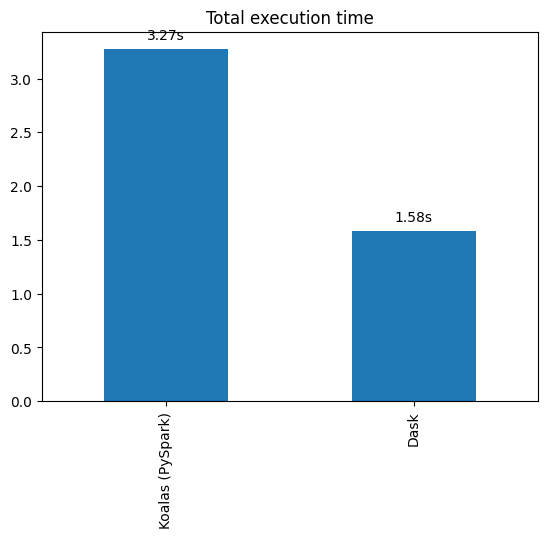

In [74]:
annotate(ops_with_filtering_caching.sum().plot.bar(title='Total execution time'))

## Observações

Ao comparar a performance das bibliotecas Koalas (PySpark) e Dask, diversas operações foram executadas, tanto em dados brutos quanto em dados filtrados e filtrados com caching. A análise revela um panorama interessante sobre a eficiência de ambas as bibliotecas.

Para operações sem filtragem, o Dask demonstrou ser significativamente mais rápido na leitura inicial do arquivo, com um tempo de 0.007313 segundos em comparação com os 0.172114 segundos de Koalas. Entretanto, em todas as demais operações, o Koalas mostrou-se muito mais eficiente. Por exemplo, a operação de contagem levou 0.188165 segundos em Koalas, enquanto Dask demorou 14.161976 segundos. De maneira semelhante, a contagem de índices foi mais rápida em Koalas (0.092255 segundos) em comparação com Dask (14.075137 segundos). A tendência manteve-se para cálculos de média, desvio padrão, adição e multiplicação de séries, contagem de valores, operações aritméticas complexas e estatísticas de agrupamento, onde o Koalas foi consistentemente mais rápido, com tempos variando entre 0.326843 e 6.101567 segundos, enquanto que o Dask levou de 14.063892 a 15.398112 segundos. No entanto, algumas operações em Koalas, como adição de séries, multiplicação de séries e operações de junção, não puderam ser concluídas devido a limitações de memória, resultando em valores NaN.

Quando os dados foram filtrados, a superioridade de Koalas em termos de tempo de execução permaneceu evidente. A operação de contagem levou 0.408928 segundos em Koalas contra 14.474323 segundos em Dask. A contagem de índices foi completada em 0.301121 segundos por Koalas, enquanto Dask precisou de 14.530146 segundos. Para calcular a média, Koalas levou 0.543700 segundos em comparação com 14.427309 segundos de Dask. Outras operações, incluindo desvio padrão, adição e multiplicação de séries, média de operações aritméticas complexas, contagem de valores e estatísticas de agrupamento, também foram realizadas mais rapidamente pelo Koalas, com tempos entre 0.545043 e 3.864372 segundos, enquanto Dask levou entre 14.401383 e 14.878332 segundos. No entanto, mais uma vez, algumas operações em Koalas, como adição de séries, multiplicação de séries e operações de junção, não puderam ser concluídas devido a limitações de memória, resultando em valores NaN.

Com a introdução do caching, observou-se uma melhoria no desempenho de ambas as bibliotecas. A operação de contagem com caching foi mais eficiente em Dask, levando 0.013732 segundos, comparado com 0.063100 segundos de Koalas. A contagem de índices também foi mais rápida em Dask (0.019761 segundos) comparado com Koalas (0.049356 segundos). Cálculos de média, desvio padrão, adição e multiplicação de séries, contagem de valores e média de operações aritméticas complexas também foram mais rápidos em Dask, com tempos variando de 0.036645 a 0.287676 segundos, enquanto Koalas levou de 0.101004 a 1.783648 segundos. Estatísticas de agrupamento foram realizadas em 0.151895 segundos por Dask, contra 0.408749 segundos de Koalas. Novamente, a adição de séries, multiplicação de séries e operações de junção, não puderam ser realizadas em Koalas.

De modo geral, o Koalas demonstrou ser mais eficiente em termos de tempo de execução para a maioria das operações sem filtragem e com filtragem. No entanto, Dask foi mais eficiente para operações com caching. Para além disso, o Koalas enfrenta limitações de memória que impedem a execução de algumas operações, resultando em valores NaN. Embora o Koalas seja geralmente mais rápido sem caching, ele consome mais memória, o que impede a realização de certas operações.

# Repetição para datasets com 2 e 3 Ficheiros

In [75]:
client.restart()

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:33001/status,
Dashboard: http://127.0.0.1:33001/status,Workers: 4
Total threads: 8,Total memory: 62.79 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42215,Workers: 4
Dashboard: http://127.0.0.1:33001/status,Total threads: 8
Started: 13 minutes ago,Total memory: 62.79 GiB
Comm: tcp://127.0.0.1:39777,Total threads: 2
Dashboard: http://127.0.0.1:37317/status,Memory: 15.70 GiB
Nanny: tcp://127.0.0.1:38271,


## Dask

Repetiu-se o estudo, mas agora selecionando uma amostra maior (com 2 files e 3 files). 
Começou-se por ler os ficheiros parquet selecionados, os dois primeiros do ano de 2009 (meses de Janeiro e Fevereiro) para uma amostra com 2 files, seguindo-se a leitura dos ficheiros parquet selecionados, os três primeiros meses do ano de 2009 para uma amostra composta por 3 files.
Criou-se ainda um dataframe Dask para cada amostra de dados, bem como a inicialização dos benchmark dictionaries.

In [9]:
# Read the downloaded Parquet files
parquet_files2 = ['Ficheiros/taxi_csv/yellow_tripdata_2009-01.parquet', 
                 'Ficheiros/taxi_csv/yellow_tripdata_2009-02.parquet']

parquet_files3 = [
    'Ficheiros/taxi_csv/yellow_tripdata_2009-01.parquet', 
    'Ficheiros/taxi_csv/yellow_tripdata_2009-02.parquet',
    'Ficheiros/taxi_csv/yellow_tripdata_2009-03.parquet'
]

dask_data2 = dd.read_parquet(parquet_files2)
dask_data3 = dd.read_parquet(parquet_files3)

# Initialize benchmark dictionaries
dask_benchmarks2 = {'duration': [], 'task': []}
dask_benchmarks_filtered2 = {'duration': [], 'task': []}
dask_benchmarks_cache2 = {'duration': [], 'task': []}

dask_benchmarks3 = {'duration': [], 'task': []}
dask_benchmarks_filtered3 = {'duration': [], 'task': []}
dask_benchmarks_cache3 = {'duration': [], 'task': []}

Imprimiu-se as colunas de cada dataframe, convertendo para letra minúscula.

In [10]:
# For dask_data2
dask_data2 = dask_data2.rename(columns=str.lower)
columns_list2 = dask_data2.columns
print(columns_list2)

# For dask_data3
dask_data3 = dask_data3.rename(columns=str.lower)
columns_list3 = dask_data3.columns
print(columns_list3)

Index(['vendor_name', 'trip_pickup_datetime', 'trip_dropoff_datetime',
       'passenger_count', 'trip_distance', 'start_lon', 'start_lat',
       'rate_code', 'store_and_forward', 'end_lon', 'end_lat', 'payment_type',
       'fare_amt', 'surcharge', 'mta_tax', 'tip_amt', 'tolls_amt',
       'total_amt'],
      dtype='object')
Index(['vendor_name', 'trip_pickup_datetime', 'trip_dropoff_datetime',
       'passenger_count', 'trip_distance', 'start_lon', 'start_lat',
       'rate_code', 'store_and_forward', 'end_lon', 'end_lat', 'payment_type',
       'fare_amt', 'surcharge', 'mta_tax', 'tip_amt', 'tolls_amt',
       'total_amt'],
      dtype='object')


Definiu-se um index novo, para assegurar que cada partição estava alinhada. Por fim, juntou-se as partições num único dataframe dfs.

In [11]:
# Define the list of Dask dataframes
dfs = [dask_data2, dask_data3]

Definiu-se as funções para cálculo das benchmarks, para ambas as partições.

In [12]:
def count(df=None):
    return len(df)
 
def count_index_length(df=None):
    return len(df.index)
 
def mean(df):
    return df.fare_amt.mean().compute()
 
def standard_deviation(df):
    return df.fare_amt.std().compute()
 
def mean_of_sum(df):
    return (df.fare_amt + df.tip_amt).mean().compute()
 
def sum_columns(df):
    return (df.fare_amt + df.tip_amt).compute()
 
def mean_of_product(df):
    return (df.fare_amt * df.tip_amt).mean().compute()
 
def product_columns(df):
    return (df.fare_amt * df.tip_amt).compute()
  
def value_counts(df):
    return df.fare_amt.value_counts().compute()
  
def mean_of_complicated_arithmetic_operation(df):
    theta_1 = df.start_lon
    phi_1 = df.start_lat
    theta_2 = df.end_lon
    phi_2 = df.end_lat
    temp = (np.sin((theta_2-theta_1)/2*np.pi/180)**2
           + np.cos(theta_1*np.pi/180)*np.cos(theta_2*np.pi/180) * np.sin((phi_2-phi_1)/2*np.pi/180)**2)
    ret = 2 * np.arctan2(np.sqrt(temp), np.sqrt(1-temp))
    return ret.mean().compute()
  
def complicated_arithmetic_operation(df):
    theta_1 = df.start_lon
    phi_1 = df.start_lat
    theta_2 = df.end_lon
    phi_2 = df.end_lat
    temp = (np.sin((theta_2-theta_1)/2*np.pi/180)**2
           + np.cos(theta_1*np.pi/180)*np.cos(theta_2*np.pi/180) * np.sin((phi_2-phi_1)/2*np.pi/180)**2)
    ret = 2 * np.arctan2(np.sqrt(temp), np.sqrt(1-temp))
    return ret.compute()
  
def groupby_statistics(df):
    return df.groupby(by='passenger_count').agg(
      {
        'fare_amt': ['mean', 'std'], 
        'tip_amt': ['mean', 'std']
      }
    ).compute()

for df in dfs:
    other = groupby_statistics(df)
    other.columns = pd.Index([e[0]+'' + e[1] for e in other.columns.tolist()])

def join_count(df, other):
    return len(dd.merge(df, other, left_index=True, right_index=True))
 
def join_data(df, other):
    return dd.merge(df, other, left_index=True, right_index=True).compute()

Para cada partição no dataframe dfs, calcular a benchmark, onde o index 2 corresponde à amostra de dados com 2 files, e o 3 à amostra de dados com 3 files.

In [13]:
# Loop over each dataframe and perform benchmarks
for i, df in enumerate(dfs):
    benchmark(count, df=df, benchmarks=globals()[f'dask_benchmarks{i+2}'], name=f'count')
    benchmark(count_index_length, df=df, benchmarks=globals()[f'dask_benchmarks{i+2}'], name=f'count index length')
    benchmark(mean, df=df, benchmarks=globals()[f'dask_benchmarks{i+2}'], name=f'mean')
    benchmark(standard_deviation, df=df, benchmarks=globals()[f'dask_benchmarks{i+2}'], name=f'standard deviation')
    benchmark(mean_of_sum, df=df, benchmarks=globals()[f'dask_benchmarks{i+2}'], name=f'mean of columns addition')
    benchmark(sum_columns, df=df, benchmarks=globals()[f'dask_benchmarks{i+2}'], name=f'addition of columns')
    benchmark(mean_of_product, df=df, benchmarks=globals()[f'dask_benchmarks{i+2}'], name=f'mean of columns multiplication')
    benchmark(product_columns, df=df, benchmarks=globals()[f'dask_benchmarks{i+2}'], name=f'multiplication of columns')
    benchmark(value_counts, df=df, benchmarks=globals()[f'dask_benchmarks{i+2}'], name=f'value counts')
    benchmark(mean_of_complicated_arithmetic_operation, df=df, benchmarks=globals()[f'dask_benchmarks{i+2}'], name=f'mean of complex arithmetic ops')
    benchmark(complicated_arithmetic_operation, df=df, benchmarks=globals()[f'dask_benchmarks{i+2}'], name=f'complex arithmetic ops')
    benchmark(groupby_statistics, df=df, benchmarks=globals()[f'dask_benchmarks{i+2}'], name=f'groupby statistics')
    #benchmark(join_count, df, benchmarks=globals()[f'dask_benchmarks{i+2}'], name=f'join count {i+2}', other=other)
    #benchmark(join_data, df, benchmarks=globals()[f'dask_benchmarks{i+2}'], name=f'join {i+2}', other=other)


count took: 15.899789333343506 seconds
count index length took: 16.248594284057617 seconds
mean took: 16.162986755371094 seconds
standard deviation took: 16.277905225753784 seconds
mean of columns addition took: 16.010782957077026 seconds
addition of columns took: 16.536823511123657 seconds
mean of columns multiplication took: 16.159387588500977 seconds
multiplication of columns took: 16.751289129257202 seconds
value counts took: 16.067793607711792 seconds
mean of complex arithmetic ops took: 17.78482747077942 seconds
complex arithmetic ops took: 17.640883445739746 seconds
groupby statistics took: 16.618999481201172 seconds
count took: 17.269860982894897 seconds
count index length took: 17.44639754295349 seconds
mean took: 17.639087200164795 seconds
standard deviation took: 17.02828812599182 seconds
mean of columns addition took: 17.114664316177368 seconds
addition of columns took: 17.81433391571045 seconds
mean of columns multiplication took: 17.099321842193604 seconds
multiplication 

In [17]:
# Obter os resultados e remover duplicatas
dask_res_temp2 = get_results(dask_benchmarks2).drop_duplicates(subset='task').set_index('task')
dask_res_temp3 = get_results(dask_benchmarks3).drop_duplicates(subset='task').set_index('task')

#Print dos dataframes
print(dask_res_temp2)
print(dask_res_temp3)

# Definir o nome do arquivo ou diretório
filename2 = 'Resultados/dask_standard2'
filename3 = 'Resultados/dask_standard3'

# Salvar o DataFrame em formato Parquet
dask_res_temp2.to_parquet(filename2)
dask_res_temp3.to_parquet(filename3)

print(f'O arquivo Parquet foi salvo em {filename2}.')
print(f'O arquivo Parquet foi salvo em {filename3}.')

                                 duration
task                                     
count                           15.899789
count index length              16.248594
mean                            16.162987
standard deviation              16.277905
mean of columns addition        16.010783
addition of columns             16.536824
mean of columns multiplication  16.159388
multiplication of columns       16.751289
value counts                    16.067794
mean of complex arithmetic ops  17.784827
complex arithmetic ops          17.640883
groupby statistics              16.618999
                                 duration
task                                     
count                           17.269861
count index length              17.446398
mean                            17.639087
standard deviation              17.028288
mean of columns addition        17.114664
addition of columns             17.814334
mean of columns multiplication  17.099322
multiplication of columns       17

### Operações com filtro

Para analisar um subconjunto específico dos dados originais, foi criada uma expressão booleana para filtrar os dados Dask para a amostra de 2 files e de 3 files. A expressão seleciona os registros em que o valor da coluna tip_amt está entre 1 e 5. A função filter_data foi aplicada aos dados Dask, que recebe um DataFrame como entrada e retorna apenas os registros que satisfazem a expressão de filtro.

In [18]:
def filter_data(df, expr_filter):
    return df[expr_filter]


expr_filter2 = (dask_data2.tip_amt >= 1) & (dask_data2.tip_amt <= 5)

dask_filter2 = filter_data(dask_data2, expr_filter2)
    
expr_filter3 = (dask_data3.tip_amt >= 1) & (dask_data3.tip_amt <= 5)
dask_filter3 = filter_data(dask_data3, expr_filter3)

Os registos são então guardados numa lista dask_filtered.

In [19]:
dask_filtered = [dask_filter2, dask_filter3]

Para cada dataframe à qual foi aplicado filtro, da lista dask_filtered, calculou-se a benchmark, onde o index 2 corresponde à amostra de dados com 2 files, e o 3 à amostra de dados com 3 files.

In [20]:
# Run benchmarks on filtered dataframes
for i, df in enumerate(dask_filtered):
    benchmark(count, df, benchmarks=globals()[f'dask_benchmarks_filtered{i+2}'], name=f'filtered count')
    benchmark(count_index_length, df, benchmarks=globals()[f'dask_benchmarks_filtered{i+2}'], name=f'filtered count index length')
    benchmark(mean, df, benchmarks=globals()[f'dask_benchmarks_filtered{i+2}'], name=f'filtered mean')
    benchmark(standard_deviation, df, benchmarks=globals()[f'dask_benchmarks_filtered{i+2}'], name=f'filtered standard deviation')
    benchmark(mean_of_sum, df, benchmarks=globals()[f'dask_benchmarks_filtered{i+2}'], name=f'filtered mean of columns addition')
    benchmark(sum_columns, df, benchmarks=globals()[f'dask_benchmarks_filtered{i+2}'], name=f'filtered addition of columns')
    benchmark(mean_of_product, df, benchmarks=globals()[f'dask_benchmarks_filtered{i+2}'], name=f'filtered mean of columns multiplication')
    benchmark(product_columns, df, benchmarks=globals()[f'dask_benchmarks_filtered{i+2}'], name=f'filtered multiplication of columns')
    benchmark(mean_of_complicated_arithmetic_operation, df, benchmarks=globals()[f'dask_benchmarks_filtered{i+2}'], name=f'filtered mean of complex arithmetic ops')
    benchmark(complicated_arithmetic_operation, df, benchmarks=globals()[f'dask_benchmarks_filtered{i+2}'], name=f'filtered complex arithmetic ops')
    benchmark(value_counts, df, benchmarks=globals()[f'dask_benchmarks_filtered{i+2}'], name=f'filtered value counts')
    benchmark(groupby_statistics, df, benchmarks=globals()[f'dask_benchmarks_filtered{i+2}'], name=f'filtered groupby statistics')

filtered count took: 16.065587520599365 seconds
filtered count index length took: 16.400595664978027 seconds
filtered mean took: 16.244606256484985 seconds
filtered standard deviation took: 16.677885055541992 seconds
filtered mean of columns addition took: 16.55248761177063 seconds
filtered addition of columns took: 16.404393196105957 seconds
filtered mean of columns multiplication took: 16.52203392982483 seconds
filtered multiplication of columns took: 16.72886371612549 seconds
filtered mean of complex arithmetic ops took: 16.66231107711792 seconds
filtered complex arithmetic ops took: 17.108859300613403 seconds
filtered value counts took: 16.808639526367188 seconds
filtered groupby statistics took: 16.810043811798096 seconds
filtered count took: 17.462103605270386 seconds
filtered count index length took: 17.478203535079956 seconds
filtered mean took: 17.902372121810913 seconds
filtered standard deviation took: 18.225915670394897 seconds
filtered mean of columns addition took: 18.008

O arquivo Parquet foi salvo em Ficheiros/dask_filter2104637.
O arquivo Parquet foi salvo em Ficheiros/dask_filter3104804.

In [21]:
# Obter os resultados e remover duplicatas
dask_res_filter2 = get_results(dask_benchmarks_filtered2).drop_duplicates(subset='task').set_index('task')
dask_res_filter3 = get_results(dask_benchmarks_filtered3).drop_duplicates(subset='task').set_index('task')

#Print dos dataframes
print(dask_res_filter2)
print(dask_res_filter3)

# Definir o nome do arquivo ou diretório
filename_filter2 = 'Resultados/dask_filtered2'
filename_filter3 = 'Resultados/dask_filtered3'

# Salvar o DataFrame em formato Parquet
dask_res_filter2.to_parquet(filename_filter2)
dask_res_filter3.to_parquet(filename_filter3)

print(f'O arquivo Parquet foi salvo em {filename_filter2}.')
print(f'O arquivo Parquet foi salvo em {filename_filter3}.')

                                          duration
task                                              
filtered count                           16.065588
filtered count index length              16.400596
filtered mean                            16.244606
filtered standard deviation              16.677885
filtered mean of columns addition        16.552488
filtered addition of columns             16.404393
filtered mean of columns multiplication  16.522034
filtered multiplication of columns       16.728864
filtered mean of complex arithmetic ops  16.662311
filtered complex arithmetic ops          17.108859
filtered value counts                    16.808640
filtered groupby statistics              16.810044
                                          duration
task                                              
filtered count                           17.462104
filtered count index length              17.478204
filtered mean                            17.902372
filtered standard deviation    

### Operações com filtro e caching

Adiciona cache aos DataFrames filtrados, garantindo que os cálculos sejam persistidos e espera até que todos os cálculos sejam concluídos antes de continuar, fornecendo mensagens de status ao longo do processo. Elenca-se o mesmo, a seguir, de forma mais detalhada:

- **Cache e Wait**: O código percorre um conjunto de DataFrames filtrados (`dask_filtered`) e adiciona cache para cada um desses DataFrames, garantindo que os cálculos sejam persistentes e não recalculados quando acessados novamente.
- **Persistência dos DataFrames**: Para cada DataFrame no conjunto (`dask_filtered`), ele é persistido usando o método `client.persist(df)`, o que significa que os dados são armazenados em memória para acesso rápido e reutilização.
- **Espera por Conclusão**: Após persistir cada DataFrame, o código utiliza `wait(dask_filtered[i])` para esperar até que todas as operações futuras associadas a esse DataFrame sejam concluídas. Isso garante que os cálculos estejam finalizados antes de continuar para o próximo DataFrame.
- **Mensagens Informativas**: Durante o processo, o código imprime mensagens informativas para indicar quando começa a esperar pela conclusão dos cálculos de cada conjunto de DataFrames e quando esses cálculos são finalizados.

In [22]:
from distributed import wait


# Add caching and wait for each set of filtered dataframes
for i, df in enumerate(dask_filtered):
    dask_filtered[i] = client.persist(df)
    print(f'Waiting until all futures for set {i+2} are finished')
    wait(dask_filtered[i])
    print(f'All futures for set {i+2} are finished')

Waiting until all futures for set 2 are finished
All futures for set 2 are finished
Waiting until all futures for set 3 are finished
All futures for set 3 are finished


Percorre uma lista de DataFrames armazenados em cache, executando uma série de testes de desempenho (benchmarks) em cada um. Os benchmarks avaliam diversas operações (como contagem, média, desvio padrão, operações aritméticas complexas, etc.) e armazenam os resultados em estruturas de dados específicas para posterior análise. Cada benchmark é nomeado de maneira a refletir a operação realizada e o índice do DataFrame na lista.
De forma mais detalhada:
- **Iteração sobre DataFrames Filtrados**: O código percorre uma lista de DataFrames (`dask_filtered`), que foram previamente filtrados e armazenados em cache.
- **Execução de Benchmarks**: Para cada DataFrame, uma série de funções de benchmark são executadas. Estas funções de benchmark avaliam o desempenho de várias operações em cada DataFrame. As operações incluem:
    - Contagem (`count`)
    - Contagem do comprimento do índice (`count_index_length`)
    - Cálculo da média (`mean`)
    - Cálculo do desvio padrão (`standard_deviation`)
    - Média da soma de colunas (`mean_of_sum`)
    - Soma de colunas (`sum_columns`)
    - Média do produto de colunas (`mean_of_product`)
    - Produto de colunas (`product_columns`)
    - Média de operações aritméticas complexas (`mean_of_complicated_arithmetic_operation`)
    - Operações aritméticas complexas (`complicated_arithmetic_operation`)
    - Contagem de valores (`value_counts`)
    - Estatísticas de agrupamento (`groupby_statistics`)

- **Armazenamento dos Resultados**: Os resultados de cada benchmark são armazenados num objeto `benchmarks` específico, que é obtido dinamicamente usando `globals()`. Esse objeto é diferente para cada conjunto de benchmarks (`dask_benchmarks_cache{i+2}`), onde `{i+2}` é um identificador único para cada DataFrame na lista.

4. **Nomenclatura das Operações**: Cada benchmark é nomeado de forma descritiva para indicar a operação e o índice do DataFrame sendo testado (por exemplo, `cache count {i+2}`, `cache mean {i+2}`, etc.). Aqui o index 2 corresponde á amostra de 2 files e o index 3 à amostra de 3 files.

In [23]:
# Run benchmarks on cached dataframes
for i, df in enumerate(dask_filtered):
    benchmark(count, df, benchmarks=globals()[f'dask_benchmarks_cache{i+2}'], name=f'cache count')
    benchmark(count_index_length, df, benchmarks=globals()[f'dask_benchmarks_cache{i+2}'], name=f'cache count index length')
    benchmark(mean, df, benchmarks=globals()[f'dask_benchmarks_cache{i+2}'], name=f'cache mean')
    benchmark(standard_deviation, df, benchmarks=globals()[f'dask_benchmarks_cache{i+2}'], name=f'cache standard deviation')
    benchmark(mean_of_sum, df, benchmarks=globals()[f'dask_benchmarks_cache{i+2}'], name=f'cache mean of columns addition')
    benchmark(sum_columns, df, benchmarks=globals()[f'dask_benchmarks_cache{i+2}'], name=f'cache addition of columns')
    benchmark(mean_of_product, df, benchmarks=globals()[f'dask_benchmarks_cache{i+2}'], name=f'cache mean of columns multiplication')
    benchmark(product_columns, df, benchmarks=globals()[f'dask_benchmarks_cache{i+2}'], name=f'cache multiplication of columns')
    benchmark(mean_of_complicated_arithmetic_operation, df, benchmarks=globals()[f'dask_benchmarks_cache{i+2}'], name=f'cache mean of complex arithmetic ops')
    benchmark(complicated_arithmetic_operation, df, benchmarks=globals()[f'dask_benchmarks_cache{i+2}'], name=f'cache complex arithmetic ops')
    benchmark(value_counts, df, benchmarks=globals()[f'dask_benchmarks_cache{i+2}'], name=f'cache value counts')
    benchmark(groupby_statistics, df, benchmarks=globals()[f'dask_benchmarks_cache{i+2}'], name=f'cache groupby statistics')


cache count took: 0.017897367477416992 seconds
cache count index length took: 0.021130800247192383 seconds
cache mean took: 0.04078221321105957 seconds
cache standard deviation took: 0.04951286315917969 seconds
cache mean of columns addition took: 0.05072927474975586 seconds
cache addition of columns took: 0.20015764236450195 seconds
cache mean of columns multiplication took: 0.04192209243774414 seconds
cache multiplication of columns took: 0.20235466957092285 seconds
cache mean of complex arithmetic ops took: 0.30350351333618164 seconds
cache complex arithmetic ops took: 0.4623565673828125 seconds
cache value counts took: 0.038599491119384766 seconds
cache groupby statistics took: 0.15685081481933594 seconds
cache count took: 0.017228126525878906 seconds
cache count index length took: 0.0210416316986084 seconds
cache mean took: 0.045587778091430664 seconds
cache standard deviation took: 0.06216096878051758 seconds
cache mean of columns addition took: 0.04430794715881348 seconds
cache 

O arquivo Parquet foi salvo em Ficheiros/dask_cache2113126.
O arquivo Parquet foi salvo em Ficheiros/dask_cache3113128.

In [24]:
# Obter os resultados e remover duplicatas
dask_res_cache2 = get_results(dask_benchmarks_cache2).drop_duplicates(subset='task').set_index('task')
dask_res_cache3 = get_results(dask_benchmarks_cache3).drop_duplicates(subset='task').set_index('task')

#Print dos dataframes
print(dask_res_cache2)
print(dask_res_cache3)

# Definir o nome do arquivo ou diretório
filename_cache2 = 'Resultados/dask_cache2'
filename_cache3 = 'Resultados/dask_cache3'

# Salvar o DataFrame em formato Parquet
dask_res_cache2.to_parquet(filename_cache2)
dask_res_cache3.to_parquet(filename_cache3)

print(f'O arquivo Parquet foi salvo em {filename_cache2}.')
print(f'O arquivo Parquet foi salvo em {filename_cache3}.')

                                      duration
task                                          
cache count                           0.017897
cache count index length              0.021131
cache mean                            0.040782
cache standard deviation              0.049513
cache mean of columns addition        0.050729
cache addition of columns             0.200158
cache mean of columns multiplication  0.041922
cache multiplication of columns       0.202355
cache mean of complex arithmetic ops  0.303504
cache complex arithmetic ops          0.462357
cache value counts                    0.038599
cache groupby statistics              0.156851
                                      duration
task                                          
cache count                           0.017228
cache count index length              0.021042
cache mean                            0.045588
cache standard deviation              0.062161
cache mean of columns addition        0.044308
cache additio

In [8]:
client.restart()

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 62.79 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38873,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 62.79 GiB
Comm: tcp://127.0.0.1:42957,Total threads: 2
Dashboard: http://127.0.0.1:34901/status,Memory: 15.70 GiB
Nanny: tcp://127.0.0.1:35395,


## Koalas

### Leitura de DataFrames Koalas

Fez-se a seleção das amostras maiores do dataset original.
- **Leitura de Dois Arquivos**: ler dois arquivos Parquet usando o Koalas e combiná-los num único DataFrame `koalas_data2`.

- **Leitura de Três Arquivos**:ler três arquivos Parquet usando o Koalas e combiná-los num único DataFrame `koalas_data3`.

Para armazenar os resultados dos benchmarks, foram inicializados dicionários para os DataFrames combinados.

- **Dicionários de Benchmarks para Dois Arquivos**:Três dicionários são criados (`koalas_benchmarks2`, `koalas_benchmarks_filtered2`, `koalas_benchmarks_cache2`), cada um com duas chaves: `duration` e `task`, que armazenarão a duração e a descrição das tarefas benchmarked.
- **Dicionários de Benchmarks para Três Arquivos**: Da mesma forma, três dicionários são criados (`koalas_benchmarks3`, `koalas_benchmarks_filtered3`, `koalas_benchmarks_cache3`) para armazenar os resultados dos benchmarks para os três arquivos combinados.

In [76]:
# Read the Koalas dataframes for two files
koalas_data2 = ks.read_parquet([
    'Ficheiros/taxi_csv/yellow_tripdata_2009-01.parquet', 
    'Ficheiros/taxi_csv/yellow_tripdata_2009-02.parquet'
])

# Read the Koalas dataframes for three files
koalas_data3 = ks.read_parquet([
    'Ficheiros/taxi_csv/yellow_tripdata_2009-01.parquet', 
    'Ficheiros/taxi_csv/yellow_tripdata_2009-02.parquet',
    'Ficheiros/taxi_csv/yellow_tripdata_2009-03.parquet'
])

# Initialize benchmark dictionaries for two files
koalas_benchmarks2 = {'duration': [], 'task': []}
koalas_benchmarks_filtered2 = {'duration': [], 'task': []}
koalas_benchmarks_cache2 = {'duration': [], 'task': []}

# Initialize benchmark dictionaries for three files
koalas_benchmarks3 = {'duration': [], 'task': []}
koalas_benchmarks_filtered3 = {'duration': [], 'task': []}
koalas_benchmarks_cache3 = {'duration': [], 'task': []}


Renomear as colunas dos DataFrames `koalas_data2` e `koalas_data3` para letras minúsculas e imprimir a lista das novas colunas.
- **Renomear Colunas para `koalas_data2`**:
   - As colunas do DataFrame `koalas_data2` são renomeadas para letras minúsculas usando `rename(columns=str.lower)`.
   - A lista das novas colunas é armazenada em `columns_list2` e exibida com `print(columns_list2)`.
- **Renomear Colunas para `koalas_data3`**:
   - As colunas do DataFrame `koalas_data3` são renomeadas para letras minúsculas usando `rename(columns=str.lower)`.
   - A lista das novas colunas é armazenada em `columns_list3` e exibida com `print(columns_list3)`.

Esta etapa garante que todas as colunas dos DataFrames estejam em letras minúsculas, facilitando a manipulação e análise subsequente dos dados.

In [79]:
# Extract the current column names for koalas_data2
current_columns2 = koalas_data2.columns

# Create a dictionary mapping current column names to their lowercase versions
rename_dict2 = {col: col.lower() for col in current_columns2}

# Rename the columns using the dictionary
koalas_data2 = koalas_data2.rename(columns=rename_dict2)

# Print the updated column names for koalas_data2 to verify
columns_list2 = koalas_data2.columns
print(columns_list2)

# Extract the current column names for koalas_data3
current_columns3 = koalas_data3.columns

# Create a dictionary mapping current column names to their lowercase versions
rename_dict3 = {col: col.lower() for col in current_columns3}

# Rename the columns using the dictionary
koalas_data3 = koalas_data3.rename(columns=rename_dict3)

# Print the updated column names for koalas_data3 to verify
columns_list3 = koalas_data3.columns
print(columns_list3)

Index(['vendor_name', 'trip_pickup_datetime', 'trip_dropoff_datetime',
       'passenger_count', 'trip_distance', 'start_lon', 'start_lat',
       'rate_code', 'store_and_forward', 'end_lon', 'end_lat', 'payment_type',
       'fare_amt', 'surcharge', 'mta_tax', 'tip_amt', 'tolls_amt',
       'total_amt'],
      dtype='object')
Index(['vendor_name', 'trip_pickup_datetime', 'trip_dropoff_datetime',
       'passenger_count', 'trip_distance', 'start_lon', 'start_lat',
       'rate_code', 'store_and_forward', 'end_lon', 'end_lat', 'payment_type',
       'fare_amt', 'surcharge', 'mta_tax', 'tip_amt', 'tolls_amt',
       'total_amt'],
      dtype='object')


Definiu-se uma lista chamada dfs que contém dois DataFrames Koalas: koalas_data2 e koalas_data3.

In [80]:
# Define the list of Koalas dataframes
dfs = [koalas_data2, koalas_data3]


**Definição das Funções de Benchmark**: Diversas funções são definidas para calcular estatísticas, realizar operações aritméticas complexas e manipular dados nos DataFrames.

**Agrupamento e Conversão**: Aplica a função de agrupamento `groupby_statistics` aos DataFrames e converte os resultados para DataFrames Pandas.

**Funções de Junção**: Define funções para contar e realizar junções de DataFrames. 

**Funções para realizar diferentes operações de benchmark nos DataFrames sumariadas com mais detalhe**:
- **Funções de Contagem**:
   - `count(df=None)`: Retorna o número de linhas no DataFrame.
   - `count_index_length(df=None)`: Retorna o comprimento do índice do DataFrame.
- **Funções Estatísticas**:
   - `mean(df)`: Calcula a média da coluna `fare_amt`.
   - `standard_deviation(df)`: Calcula o desvio padrão da coluna `fare_amt`.
   - `mean_of_sum(df)`: Calcula a média da soma das colunas `fare_amt` e `tip_amt`.
   - `sum_columns(df)`: Retorna a soma das colunas `fare_amt` e `tip_amt`.
   - `mean_of_product(df)`: Calcula a média do produto das colunas `fare_amt` e `tip_amt`.
   - `product_columns(df)`: Retorna o produto das colunas `fare_amt` e `tip_amt`.
   - `value_counts(df)`: Conta a frequência dos valores na coluna `fare_amt`.
- **Operações Aritméticas Complexas**:
   - `complicated_arithmetic_operation(df)`: Realiza uma operação aritmética complexa envolvendo coordenadas geográficas (`start_lon`, `start_lat`, `end_lon`, `end_lat`).
   - `mean_of_complicated_arithmetic_operation(df)`: Calcula a média da operação aritmética complexa.
- **Estatísticas de Agrupamento**:
   - `groupby_statistics(df)`: Agrupa o DataFrame por `passenger_count` e calcula a média e o desvio padrão das colunas `fare_amt` e `tip_amt`.

Para cada DataFrame em `dfs`, a função `groupby_statistics` é aplicada, e o resultado é convertido para um DataFrame Pandas. As colunas do DataFrame resultante são renomeadas para combinar os nomes das colunas agrupadas com os nomes das estatísticas.

Duas funções adicionais são definidas para realizar junções entre DataFrames:

1. **`join_count(df, other)`**: Retorna o número de linhas resultantes da junção entre o DataFrame `df` e outro DataFrame `other`.
2. **`join_data(df, other)`**: Realiza a junção entre o DataFrame `df` e outro DataFrame `other`, retornando o DataFrame resultante.

Contudo, estas duas funções deram um erro associado à necessidade de mais memória do que a que está disponível, daí terem sido comentadas, posteriormente no cálculo das benchmarks.


In [81]:
import pyspark.sql.functions as F
def count(df=None):
    return len(df)
 
def count_index_length(df=None):
    return len(df.index)
 
def mean(df):
    return df.fare_amt.mean()
 
def standard_deviation(df):
    return df.fare_amt.std()
 
def mean_of_sum(df):
    return (df.fare_amt + df.tip_amt).mean()
 
def sum_columns(df):
    x = df.fare_amt + df.tip_amt
    x.to_pandas()
    return x
 
def mean_of_product(df):
    return (df.fare_amt * df.tip_amt).mean()
 
def product_columns(df):
    x = df.fare_amt * df.tip_amt
    x.to_pandas()
    return x
 
def value_counts(df):
    val_counts = df.fare_amt.value_counts()
    val_counts.to_pandas()
    return val_counts
  
def complicated_arithmetic_operation(df):
    theta_1 = df.start_lon
    phi_1 = df.start_lat
    theta_2 = df.end_lon
    phi_2 = df.end_lat
    temp = (np.sin((theta_2 - theta_1) / 2 * np.pi / 180) ** 2
           + np.cos(theta_1 * np.pi / 180) * np.cos(theta_2 * np.pi / 180) * np.sin((phi_2 - phi_1) / 2 * np.pi / 180) ** 2)
    ret = np.multiply(np.arctan2(np.sqrt(temp), np.sqrt(1-temp)),2)
    ret.to_pandas()
    return ret
  
def mean_of_complicated_arithmetic_operation(df):
    theta_1 = df.start_lon
    phi_1 = df.start_lat
    theta_2 = df.end_lon
    phi_2 = df.end_lat
    temp = (np.sin((theta_2 - theta_1) / 2 * np.pi / 180) ** 2
           + np.cos(theta_1 * np.pi / 180) * np.cos(theta_2 * np.pi / 180) * np.sin((phi_2 - phi_1) / 2 * np.pi / 180) ** 2)
    ret = np.multiply(np.arctan2(np.sqrt(temp), np.sqrt(1-temp)),2) 
    return ret.mean()
  
def groupby_statistics(df):
    gb = df.groupby(by='passenger_count').agg(
      {
        'fare_amt': ['mean', 'std'], 
        'tip_amt': ['mean', 'std']
      }
    )
    gb.to_pandas()
    return gb
  

for df in dfs:
    other = ks.DataFrame(groupby_statistics(df).to_pandas())
    other.columns = pd.Index([e[0]+'_' + e[1] for e in other.columns.tolist()])

def join_count(df, other):
    return len(df.merge(other.spark.hint("broadcast"), left_index=True, right_index=True))
 
def join_data(df, other):
    ret = df.merge(other.spark.hint("broadcast"), left_index=True, right_index=True)
    ret.to_pandas()
    return ret

Medir e armazenar o desempenho de várias operações num DataFrame Koalas, permitindo a análise do tempo necessário para executar essas operações. 

Realizar benchmarks num DataFrame Koalas (`dfs[0]`) e armazenar os resultados num dicionário de benchmarks chamado `koalas_benchmarks2`. Cada benchmark mede o desempenho de diferentes operações no DataFrame. A seguir, uma descrição das operações realizadas:

- **`benchmark(count, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks2'], name=f'count 2')`**:
   - Mede o tempo de execução para contar o número total de linhas no DataFrame.
- **`benchmark(count_index_length, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks2'], name=f'count index length 2')`**:
   - Mede o tempo de execução para contar o comprimento do índice do DataFrame.
- **`benchmark(mean, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks2'], name=f'mean 2')`**:
   - Mede o tempo de execução para calcular a média da coluna `fare_amt`.
- **`benchmark(standard_deviation, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks2'], name=f'standard deviation 2')`**:
   - Mede o tempo de execução para calcular o desvio padrão da coluna `fare_amt`.
- **`benchmark(mean_of_sum, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks2'], name=f'mean of columns addition 2')`**:
   - Mede o tempo de execução para calcular a média da soma das colunas `fare_amt` e `tip_amt`.
-  **`benchmark(mean_of_product, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks2'], name=f'mean of columns multiplication 2')`**:
   - Mede o tempo de execução para calcular a média do produto das colunas `fare_amt` e `tip_amt`.
- **`benchmark(value_counts, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks2'], name=f'value counts 2')`**:
   - Mede o tempo de execução para contar a frequência dos valores na coluna `fare_amt`.
- **`benchmark(mean_of_complicated_arithmetic_operation, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks2'], name=f'mean of complex arithmetic ops 2')`**:
   - Mede o tempo de execução para calcular a média de uma operação aritmética complexa envolvendo coordenadas geográficas (`start_lon`, `start_lat`, `end_lon`, `end_lat`).
-  **`benchmark(groupby_statistics, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks2'], name=f'groupby statistics 2')`**:
   - Mede o tempo de execução para agrupar o DataFrame por `passenger_count` e calcular a média e o desvio padrão das colunas `fare_amt` e `tip_amt`.

In [82]:
benchmark(count, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks2'], name=f'count')
benchmark(count_index_length, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks2'], name=f'count index length')
benchmark(mean, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks2'], name=f'mean')
benchmark(standard_deviation, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks2'], name=f'standard deviation')
benchmark(mean_of_sum, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks2'], name=f'mean of columns addition')
#benchmark(sum_columns, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks 2'], name=f'addition of columns')
benchmark(mean_of_product, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks2'], name=f'mean of columns multiplication')
#benchmark(product_columns, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks 2'], name=f'multiplication of columns')
benchmark(value_counts, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks2'], name=f'value counts')
benchmark(mean_of_complicated_arithmetic_operation, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks2'], name=f'mean of complex arithmetic ops')
#benchmark(complicated_arithmetic_operation, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks 2'], name=f'complex arithmetic ops')
benchmark(groupby_statistics, df=dfs[0], benchmarks=globals()[f'koalas_benchmarks2'], name=f'groupby statistics')
#benchmark(join_count, dfs[0], benchmarks=globals()[f'koalas_benchmarks 2'], name=f'join count', other=other)
#benchmark(join_data, dfs[0], benchmarks=globals()[f'koalas_benchmarks 2'], name=f'join', other=other)

count took: 0.0761113166809082 seconds
count index length took: 0.0676124095916748 seconds
mean took: 0.24829387664794922 seconds
standard deviation took: 0.36184048652648926 seconds
mean of columns addition took: 0.48241758346557617 seconds
mean of columns multiplication took: 0.4721693992614746 seconds


value counts took: 1.19325852394104 seconds


mean of complex arithmetic ops took: 6.357683897018433 seconds


groupby statistics took: 1.4309089183807373 seconds


1.4309089183807373

O anterior estava direcionado para a amostra de 2 files, agora de forma análoga, mas para realizar benchmarks num DataFrame Koalas (dfs[1]) e armazenar os resultados num dicionário de benchmarks chamado koalas_benchmarks3, isto é, para a amostra de 3 files.


In [83]:
benchmark(count, df=dfs[1], benchmarks=globals()[f'koalas_benchmarks3'], name=f'count')
benchmark(count_index_length, df=dfs[1], benchmarks=globals()[f'koalas_benchmarks3'], name=f'count index length')
benchmark(mean, df=dfs[1], benchmarks=globals()[f'koalas_benchmarks3'], name=f'mean')
benchmark(standard_deviation, df=dfs[1], benchmarks=globals()[f'koalas_benchmarks3'], name=f'standard deviation')
benchmark(mean_of_sum, df=dfs[1], benchmarks=globals()[f'koalas_benchmarks3'], name=f'mean of columns addition')
#benchmark(sum_columns, df=dfs[1], benchmarks=globals()[f'koalas_benchmarks 3'], name=f'addition of columns')
benchmark(mean_of_product, df=dfs[1], benchmarks=globals()[f'koalas_benchmarks3'], name=f'mean of columns multiplication')
#benchmark(product_columns, df=dfs[1], benchmarks=globals()[f'koalas_benchmarks3'], name=f'multiplication of columns')
benchmark(value_counts, df=dfs[1], benchmarks=globals()[f'koalas_benchmarks3'], name=f'value counts')
#benchmark(mean_of_complicated_arithmetic_operation, df=dfs[1], benchmarks=globals()[f'koalas_benchmarks3'], name=f'mean of complex arithmetic ops')
#benchmark(complicated_arithmetic_operation, df=dfs[1], benchmarks=globals()[f'koalas_benchmarks 3'], name=f'complex arithmetic ops')
benchmark(groupby_statistics, df=dfs[1], benchmarks=globals()[f'koalas_benchmarks3'], name=f'groupby statistics')
#benchmark(join_count, dfs[1], benchmarks=globals()[f'koalas_benchmarks 3'], name=f'join count', other=other)
#benchmark(join_data, dfs[1], benchmarks=globals()[f'koalas_benchmarks 3'], name=f'join', other=other)

count took: 0.08408498764038086 seconds
count index length took: 0.053652286529541016 seconds
mean took: 0.28235840797424316 seconds
standard deviation took: 0.3624858856201172 seconds
mean of columns addition took: 0.4349803924560547 seconds
mean of columns multiplication took: 0.5234129428863525 seconds


value counts took: 1.3610785007476807 seconds


groupby statistics took: 1.3812429904937744 seconds


1.3812429904937744

Salvou-se os resultados.

In [84]:
# Obter os resultados e remover duplicatas
koalas_res_temp2 = get_results(koalas_benchmarks2).drop_duplicates(subset='task').set_index('task')
koalas_res_temp3 = get_results(koalas_benchmarks3).drop_duplicates(subset='task').set_index('task')

# Print dos dataframes
print(koalas_res_temp2)
print(koalas_res_temp3)

# Definir o nome do arquivo ou diretório
filename2 = 'Resultados/koalas_standard2'
filename3 = 'Resultados/koalas_standard3'

# Salvar o DataFrame em formato Parquet
koalas_res_temp2.to_parquet(filename2)
koalas_res_temp3.to_parquet(filename3)

print(f'O arquivo Parquet foi salvo em {filename2}.')
print(f'O arquivo Parquet foi salvo em {filename3}.')

                                duration
task                                    
count                           0.076111
count index length              0.067612
mean                            0.248294
standard deviation              0.361840
mean of columns addition        0.482418
mean of columns multiplication  0.472169
value counts                    1.193259
mean of complex arithmetic ops  6.357684
groupby statistics              1.430909
                                duration
task                                    
count                           0.084085
count index length              0.053652
mean                            0.282358
standard deviation              0.362486
mean of columns addition        0.434980
mean of columns multiplication  0.523413
value counts                    1.361079
groupby statistics              1.381243
O arquivo Parquet foi salvo em Resultados/koalas_standard2.
O arquivo Parquet foi salvo em Resultados/koalas_standard3.


### Operações com filtro

Criar e aplicar filtros específicos nos DataFrames koalas_data2 e koalas_data3 para selecionar registros onde o valor da gorjeta (tip_amt) está entre 1 e 5. Esses filtros são aplicados usando uma função genérica filter_data, e os resultados filtrados são armazenados em dask_filter2 e dask_filter3 respectivamente. Isso permite a análise focada num subconjunto específico de dados baseado nos critérios definidos.

In [85]:
def filter_data(df, expr_filter):
    return df[expr_filter]


expr_filter2 = (koalas_data2.tip_amt >= 1) & (koalas_data2.tip_amt <= 5)

dask_filter2 = filter_data(koalas_data2, expr_filter2)
    
expr_filter3 = (koalas_data3.tip_amt >= 1) & (koalas_data3.tip_amt <= 5)
dask_filter3 = filter_data(koalas_data3, expr_filter3)

Realizar benchmarks em dois DataFrames Koalas filtrados, armazenando os resultados em dicionários de benchmarks chamados `koalas_benchmarks_filtered2` e `koalas_benchmarks_filtered3`. 

- **Lista de DataFrames Filtrados**: Definir uma lista de DataFrames Koalas filtrados.


In [87]:
koalas_filtered=[koalas_data2,koalas_data3]

- **Benchmarks no Primeiro DataFrame Filtrado (`koalas_data2`)**:
   - Realizar e armazenar os benchmarks das seguintes operações em `koalas_benchmarks_filtered2`:
     - Contagem do número de linhas.
     - Contagem do comprimento do índice.
     - Cálculo da média da coluna `fare_amt`.
     - Cálculo do desvio padrão da coluna `fare_amt`.
     - Cálculo da média da soma das colunas `fare_amt` e `tip_amt`.
     - Cálculo da média do produto das colunas `fare_amt` e `tip_amt`.
     - Contagem da frequência dos valores na coluna `fare_amt`.
     - Cálculo da média de uma operação aritmética complexa.
     - Estatísticas de agrupamento (`passenger_count`) e cálculo da média e desvio padrão das colunas `fare_amt` e `tip_amt`.



In [88]:
benchmark(count, df=koalas_filtered[0], benchmarks=globals()[f'koalas_benchmarks_filtered2'], name=f'count')
benchmark(count_index_length, df=koalas_filtered[0], benchmarks=globals()[f'koalas_benchmarks_filtered2'], name=f'count index length')
benchmark(mean, df=koalas_filtered[0], benchmarks=globals()[f'koalas_benchmarks_filtered2'], name=f'mean')
benchmark(standard_deviation, df=koalas_filtered[0], benchmarks=globals()[f'koalas_benchmarks_filtered2'], name=f'standard deviation')
benchmark(mean_of_sum, df=koalas_filtered[0], benchmarks=globals()[f'koalas_benchmarks_filtered2'], name=f'mean of columns addition')
#benchmark(sum_columns, df=koalas_filtered[0], benchmarks=globals()[f'koalas_benchmarks_filtered2'], name=f'addition of columns')
benchmark(mean_of_product, df=koalas_filtered[0], benchmarks=globals()[f'koalas_benchmarks_filtered2'], name=f'mean of columns multiplication')
#benchmark(product_columns, df=koalas_filtered[0], benchmarks=globals()[f'koalas_benchmarks_filtered2'], name=f'multiplication of columns')
benchmark(value_counts, df=koalas_filtered[0], benchmarks=globals()[f'koalas_benchmarks_filtered2'], name=f'value counts')
benchmark(mean_of_complicated_arithmetic_operation, df=koalas_filtered[0], benchmarks=globals()[f'koalas_benchmarks_filtered2'], name=f'mean of complex arithmetic ops')
#benchmark(complicated_arithmetic_operation, df=koalas_filtered[0], benchmarks=globals()[f'koalas_benchmarks 2'], name=f'complex arithmetic ops')
benchmark(groupby_statistics, df=koalas_filtered[0], benchmarks=globals()[f'koalas_benchmarks_filtered2'], name=f'groupby statistics')
#benchmark(join_count, koalas_filtered[0], benchmarks=globals()[f'koalas_benchmarks_filtered2'], name=f'join count', other=other)
#benchmark(join_data, koalas_filtered[0], benchmarks=globals()[f'koalas_benchmarks_filtered2'], name=f'join', other=other)

count took: 0.05906248092651367 seconds
count index length took: 0.05235600471496582 seconds
mean took: 0.2692384719848633 seconds
standard deviation took: 0.33312344551086426 seconds
mean of columns addition took: 0.3967475891113281 seconds
mean of columns multiplication took: 0.393967866897583 seconds


value counts took: 1.1135609149932861 seconds


mean of complex arithmetic ops took: 6.367603302001953 seconds


groupby statistics took: 1.4501986503601074 seconds


1.4501986503601074

- **Benchmarks no Segundo DataFrame Filtrado (`koalas_data3`)**:
   - Realizar e armazenar os benchmarks das seguintes operações em `koalas_benchmarks_filtered3`:
     - Contagem do número de linhas.
     - Contagem do comprimento do índice.
     - Cálculo da média da coluna `fare_amt`.
     - Cálculo do desvio padrão da coluna `fare_amt`.
     - Cálculo da média da soma das colunas `fare_amt` e `tip_amt`.
     - Cálculo da média do produto das colunas `fare_amt` e `tip_amt`.
     - Contagem da frequência dos valores na coluna `fare_amt`.
     - Estatísticas de agrupamento (`passenger_count`) e cálculo da média e desvio padrão das colunas `fare_amt` e `tip_amt`.

In [89]:
benchmark(count, df=koalas_filtered[1], benchmarks=globals()[f'koalas_benchmarks_filtered3'], name=f'count')
benchmark(count_index_length, df=koalas_filtered[1], benchmarks=globals()[f'koalas_benchmarks_filtered3'], name=f'count index length')
benchmark(mean, df=koalas_filtered[1], benchmarks=globals()[f'koalas_benchmarks_filtered3'], name=f'mean')
benchmark(standard_deviation, df=koalas_filtered[1], benchmarks=globals()[f'koalas_benchmarks_filtered3'], name=f'standard deviation')
benchmark(mean_of_sum, df=koalas_filtered[1], benchmarks=globals()[f'koalas_benchmarks_filtered3'], name=f'mean of columns addition')
#benchmark(sum_columns, df=koalas_filtered[1], benchmarks=globals()[f'koalas_benchmarks_filtered3'], name=f'addition of columns')
benchmark(mean_of_product, df=koalas_filtered[1], benchmarks=globals()[f'koalas_benchmarks_filtered3'], name=f'mean of columns multiplication')
#benchmark(product_columns, df=koalas_filtered[1], benchmarks=globals()[f'koalas_benchmarks_filtered3'], name=f'multiplication of columns')
benchmark(value_counts, df=koalas_filtered[1], benchmarks=globals()[f'koalas_benchmarks_filtered3'], name=f'value counts')
#benchmark(mean_of_complicated_arithmetic_operation, df=koalas_filtered[1], benchmarks=globals()[f'koalas_benchmarks_filtered3'], name=f'mean of complex arithmetic ops')
#benchmark(complicated_arithmetic_operation, df=koalas_filtered[1], benchmarks=globals()[f'koalas_benchmarks_filtered3'], name=f'complex arithmetic ops')
benchmark(groupby_statistics, df=koalas_filtered[1], benchmarks=globals()[f'koalas_benchmarks_filtered3'], name=f'groupby statistics')
#benchmark(join_count, koalas_filtered[1], benchmarks=globals()[f'koalas_benchmarks_filtered3'], name=f'join count', other=other)
#benchmark(join_data, koalas_filtered[1], benchmarks=globals()[f'koalas_benchmarks_filtered3'], name=f'join', other=other)

count took: 0.06814122200012207 seconds
count index length took: 0.05557823181152344 seconds
mean took: 0.28867006301879883 seconds
standard deviation took: 0.36427831649780273 seconds
mean of columns addition took: 0.4194803237915039 seconds
mean of columns multiplication took: 0.5354740619659424 seconds


value counts took: 1.1843194961547852 seconds


groupby statistics took: 1.4318954944610596 seconds


1.4318954944610596

Mais uma vez, salvaram-se os resultados

In [90]:
# Obter os resultados e remover duplicatas para o primeiro conjunto de dados filtrado
koalas_res_filtered2 = get_results(koalas_benchmarks_filtered2).drop_duplicates(subset='task').set_index('task')
koalas_res_filtered3 = get_results(koalas_benchmarks_filtered3).drop_duplicates(subset='task').set_index('task')

# Print dos dataframes
print(koalas_res_filtered2)
print(koalas_res_filtered3)

# Definir o nome do arquivo ou diretório para o primeiro conjunto de dados filtrado
filename_filtered2 = 'Resultados/koalas_filtered2'
filename_filtered3 = 'Resultados/koalas_filtered3'

# Salvar o DataFrame em formato Parquet para o primeiro conjunto de dados filtrado
koalas_res_filtered2.to_parquet(filename_filtered2)
koalas_res_filtered3.to_parquet(filename_filtered3)

print(f'O arquivo Parquet foi salvo em {filename_filtered2}.')
print(f'O arquivo Parquet foi salvo em {filename_filtered3}.')

                                duration
task                                    
count                           0.059062
count index length              0.052356
mean                            0.269238
standard deviation              0.333123
mean of columns addition        0.396748
mean of columns multiplication  0.393968
value counts                    1.113561
mean of complex arithmetic ops  6.367603
groupby statistics              1.450199
                                duration
task                                    
count                           0.068141
count index length              0.055578
mean                            0.288670
standard deviation              0.364278
mean of columns addition        0.419480
mean of columns multiplication  0.535474
value counts                    1.184319
groupby statistics              1.431895
O arquivo Parquet foi salvo em Resultados/koalas_filtered2.
O arquivo Parquet foi salvo em Resultados/koalas_filtered3.


### Operações com filtro e caching

Tentou-se aplicar a cache, mas enfrentou-se o erro `java.lang.OutOfMemoryError`.
Tanto para a amostra de 2 files, como de 3 files, pelo que não se considerou mais estas operações na discussão de resultados.


In [91]:
koalas_filtered[0] = df.spark.cache()
print(f'Enforce caching for filtered dataframe 2: {len(df)} rows of filtered data')

24/06/05 22:52:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/06/05 22:52:15 ERROR Executor: Exception in task 7.0 in stage 229.0 (TID 609)
java.lang.OutOfMemoryError: Java heap space
	at java.nio.HeapByteBuffer.<init>(HeapByteBuffer.java:57)
	at java.nio.ByteBuffer.allocate(ByteBuffer.java:335)
	at org.apache.parquet.bytes.HeapByteBufferAllocator.allocate(HeapByteBufferAllocator.java:32)
	at org.apache.parquet.hadoop.ParquetFileReader$ConsecutivePartList.readAll(ParquetFileReader.java:1773)
	at org.apache.parquet.hadoop.ParquetFileReader.internalReadRowGroup(ParquetFileReader.java:953)
	at org.apache.parquet.hadoop.ParquetFileReader.readNextRowGroup(ParquetFileReader.java:909)
	at org.apache.parquet.hadoop.ParquetFileReader.readNextFilteredRowGroup(ParquetFileReader.java:1016)
	at org.apache.spark.sql.execution.datasources.parquet.SpecificParquetRecordReaderBase$ParquetRowGroupRea

ConnectionRefusedError: [Errno 111] Connection refused

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/home/marianaaraujoserrao/.local/lib/python3.8/site-packages/py4j/clientserver.py", line 516, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/marianaaraujoserrao/.local/lib/python3.8/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/home/marianaaraujoserrao/.local/lib/python3.8/site-packages/py4j/clientserver.py", line 539, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending or receiving


In [92]:
koalas_filtered[1] = df.spark.cache()
print(f'Enforce caching for filtered dataframe 2: {len(df)} rows of filtered data')

ConnectionRefusedError: [Errno 111] Connection refused